#### Data Cleaning and Validation

In [61]:
import pandas as pd
import warnings
import logging

# Suppress all warnings
warnings.filterwarnings('ignore')

# Suppress Prophet/cmdstanpy logging
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
logging.getLogger('prophet').setLevel(logging.ERROR)

In [62]:
# Load data into dataframe
airtraffic_df = pd.read_csv("data.csv")

In [63]:
# Look at 10 rows
airtraffic_df.head(10)

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
5,Jan-85,Adelaide,Muscat,Oman,17,0.000,0.000,14,0.100,0.000,31,0.100,0.000,1985,1
6,Jan-85,Adelaide,Rome,Italy,79,0.005,0.000,44,0.000,0.000,123,0.005,0.000,1985,1
7,Jan-85,Adelaide,Singapore,Singapore,2496,37.345,0.000,2037,133.203,0.112,4533,170.548,0.112,1985,1
8,Jan-85,Brisbane,Abu Dhabi,United Arab Emirates,0,0.000,0.000,3,0.000,0.000,3,0.000,0.000,1985,1
9,Jan-85,Brisbane,Auckland,New Zealand,7157,223.258,0.671,5652,33.032,3.218,12809,256.290,3.889,1985,1


In [64]:
# Display shape and type of df
airtraffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   9999 non-null   object 
 1   AustralianPort          9999 non-null   object 
 2   ForeignPort             9999 non-null   object 
 3   Country                 9999 non-null   object 
 4   Passengers_In           9999 non-null   int64  
 5   Freight_In_(tonnes)     9999 non-null   float64
 6   Mail_In_(tonnes)        9999 non-null   float64
 7   Passengers_Out          9999 non-null   int64  
 8   Freight_Out_(tonnes)    9999 non-null   float64
 9   Mail_Out_(tonnes)       9999 non-null   float64
 10  Passengers_Total        9999 non-null   int64  
 11  Freight_Total_(tonnes)  9999 non-null   float64
 12  Mail_Total_(tonnes)     9999 non-null   float64
 13  Year                    9999 non-null   int64  
 14  Month_num               9999 non-null   

In [65]:
# Get summary statistics for the data
airtraffic_df.describe()

,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1489.993499,57.578618,1.326173,1439.835784,66.320506,2.065110,2929.829283,123.899124,3.391284,1986.862086,6.199620
std,3101.650858,150.503467,5.735984,3065.381839,165.840735,6.493602,6130.619566,297.553857,10.399799,1.300700,3.442343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,1.000000
25%,45.000000,0.000000,0.000000,51.000000,0.000000,0.000000,100.000000,0.050000,0.000000,1986.000000,3.000000
50%,333.000000,2.117000,0.000000,324.000000,5.200000,0.007000,664.000000,13.100000,0.041000,1987.000000,6.000000
75%,1586.000000,41.666000,0.224500,1535.500000,58.666000,1.061500,3131.500000,93.722500,1.517500,1988.000000,9.000000
max,37754.000000,1795.482000,110.518000,38475.000000,1899.032000,103.111000,70014.000000,3242.982000,197.697000,1989.000000,12.000000


HERE ARE THE VARIABLES THAT NEED TO CHANGE
- Month -> String
- AustralianPort -> String
- ForeignPort -> String
- Country -> String

In [66]:
# Convert all of the nessesary varaibles
changed_varaibles = ["Month", "AustralianPort", "ForeignPort", "Country"]

for variable in changed_varaibles:
    airtraffic_df[variable] = airtraffic_df[variable].astype("string")

# Check if changes worked
airtraffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   9999 non-null   string 
 1   AustralianPort          9999 non-null   string 
 2   ForeignPort             9999 non-null   string 
 3   Country                 9999 non-null   string 
 4   Passengers_In           9999 non-null   int64  
 5   Freight_In_(tonnes)     9999 non-null   float64
 6   Mail_In_(tonnes)        9999 non-null   float64
 7   Passengers_Out          9999 non-null   int64  
 8   Freight_Out_(tonnes)    9999 non-null   float64
 9   Mail_Out_(tonnes)       9999 non-null   float64
 10  Passengers_Total        9999 non-null   int64  
 11  Freight_Total_(tonnes)  9999 non-null   float64
 12  Mail_Total_(tonnes)     9999 non-null   float64
 13  Year                    9999 non-null   int64  
 14  Month_num               9999 non-null   

In [67]:
# Check the frequency of null values in each column
airtraffic_df.isnull().sum()

Month                     0
AustralianPort            0
ForeignPort               0
Country                   0
Passengers_In             0
Freight_In_(tonnes)       0
Mail_In_(tonnes)          0
Passengers_Out            0
Freight_Out_(tonnes)      0
Mail_Out_(tonnes)         0
Passengers_Total          0
Freight_Total_(tonnes)    0
Mail_Total_(tonnes)       0
Year                      0
Month_num                 0
dtype: int64

In [68]:
# Check the frequency of null values in each row
airtraffic_df.isnull().sum(axis=1).sort_values(ascending = False)

0       0
1       0
2       0
3       0
4       0
       ..
9994    0
9995    0
9996    0
9997    0
9998    0
Length: 9999, dtype: int64

In [69]:
# Check if there are duplicate rows
duplicates = airtraffic_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display duplicate rows
if duplicates.sum() > 0:
    duplicate_rows = airtraffic_df[duplicates]
    display(duplicate_rows)

Number of duplicate rows: 0


In [70]:
# Check numberical columns are positive
numerical_cols = ['Passengers_In', 'Passengers_Out', 'Passengers_Total', 
                  'Freight_In_(tonnes)', 'Freight_Out_(tonnes)', 'Freight_Total_(tonnes)',
                  'Mail_In_(tonnes)', 'Mail_Out_(tonnes)', 'Mail_Total_(tonnes)']

for col in numerical_cols:
    invalid_mask = airtraffic_df[col] < 0
    invalid_count = invalid_mask.sum()

print(f"Number of invalid rows: {invalid_count}")

Number of invalid rows: 0


In [71]:
# Check month_num is within 1-12
invalid_months = len(airtraffic_df[(airtraffic_df['Month_num'] < 1) | (airtraffic_df['Month_num'] > 12)])

print(f"Number of rows with an invalid month_num: {invalid_months}")

Number of rows with an invalid month_num: 0


### EDA

In [72]:
# Import the custom analyzer
from traffic_analyzer import TrafficAnalyzer

# Initialize the analyzer with your cleaned data
analyzer = TrafficAnalyzer(airtraffic_df)


PASSENGER TRAFFIC ANALYSIS - ALL DIRECTIONS
----------------------------------------------------------------------------------------------------

Top 5 Passenger Routes - Comparison:


,Route,Inbound,Outbound,Total
228,Sydney ↔ Auckland,1486050.0,1475162.0,2961212
280,Sydney ↔ Singapore,744562.0,695456.0,1440018
281,Sydney ↔ Tokyo,588121.0,703995.0,1292116
249,Sydney ↔ Hong Kong,612428.0,539472.0,1151900
218,Perth ↔ Singapore,487258.0,465668.0,952926



Bottom 5 Passenger Routes - Comparison:


,Route,Inbound,Outbound,Total
87,Cairns ↔ Honiara,0.0,1.0,1
125,Darwin ↔ Zagreb,0.0,1.0,1
134,Hobart ↔ Tokyo,0.0,1.0,1
303,Townsville ↔ San Francisco,1.0,0.0,1
130,Hobart ↔ Los Angeles,2.0,0.0,2


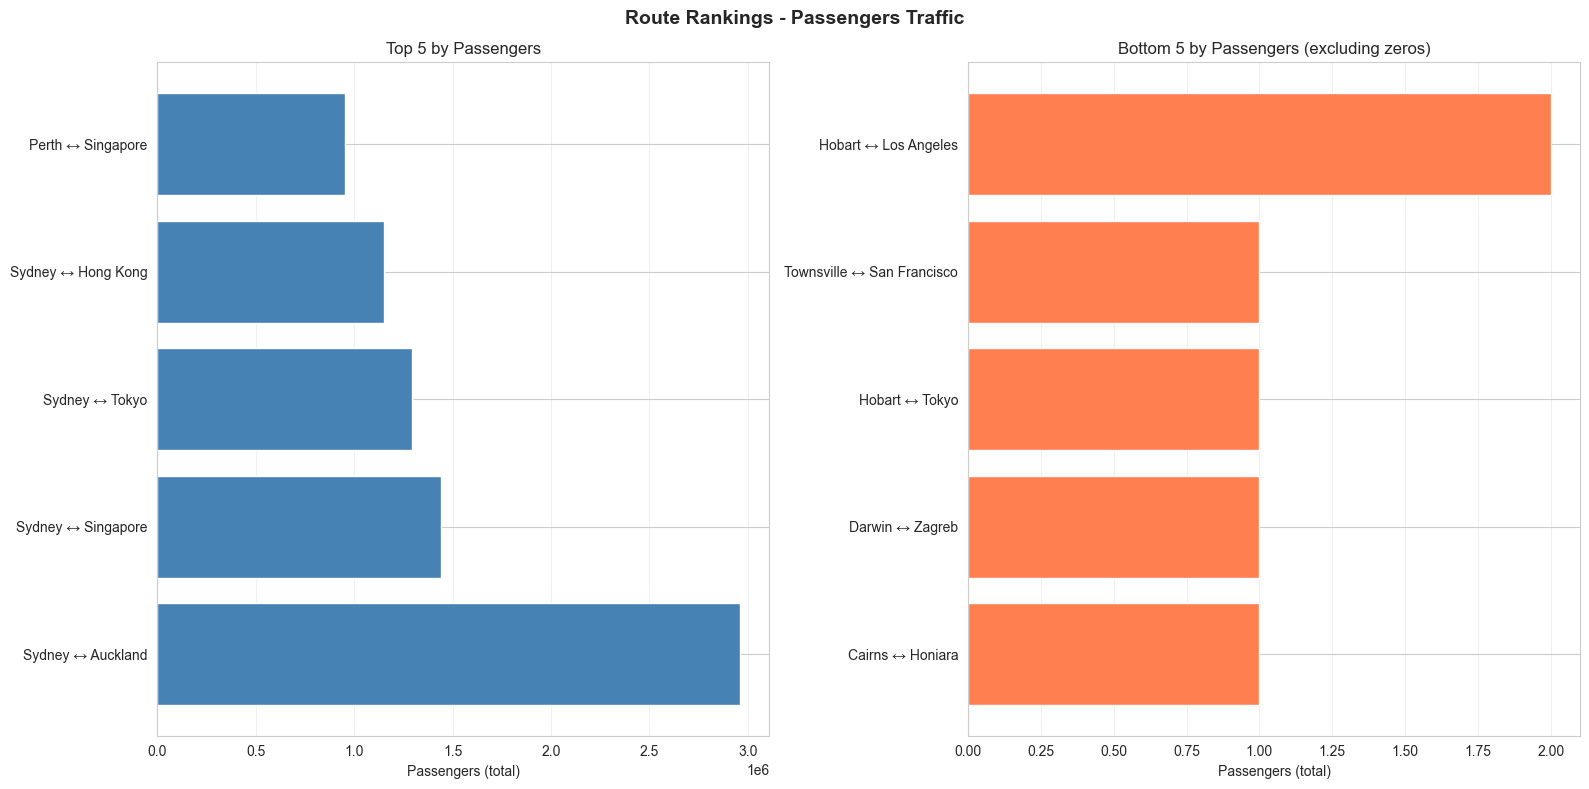

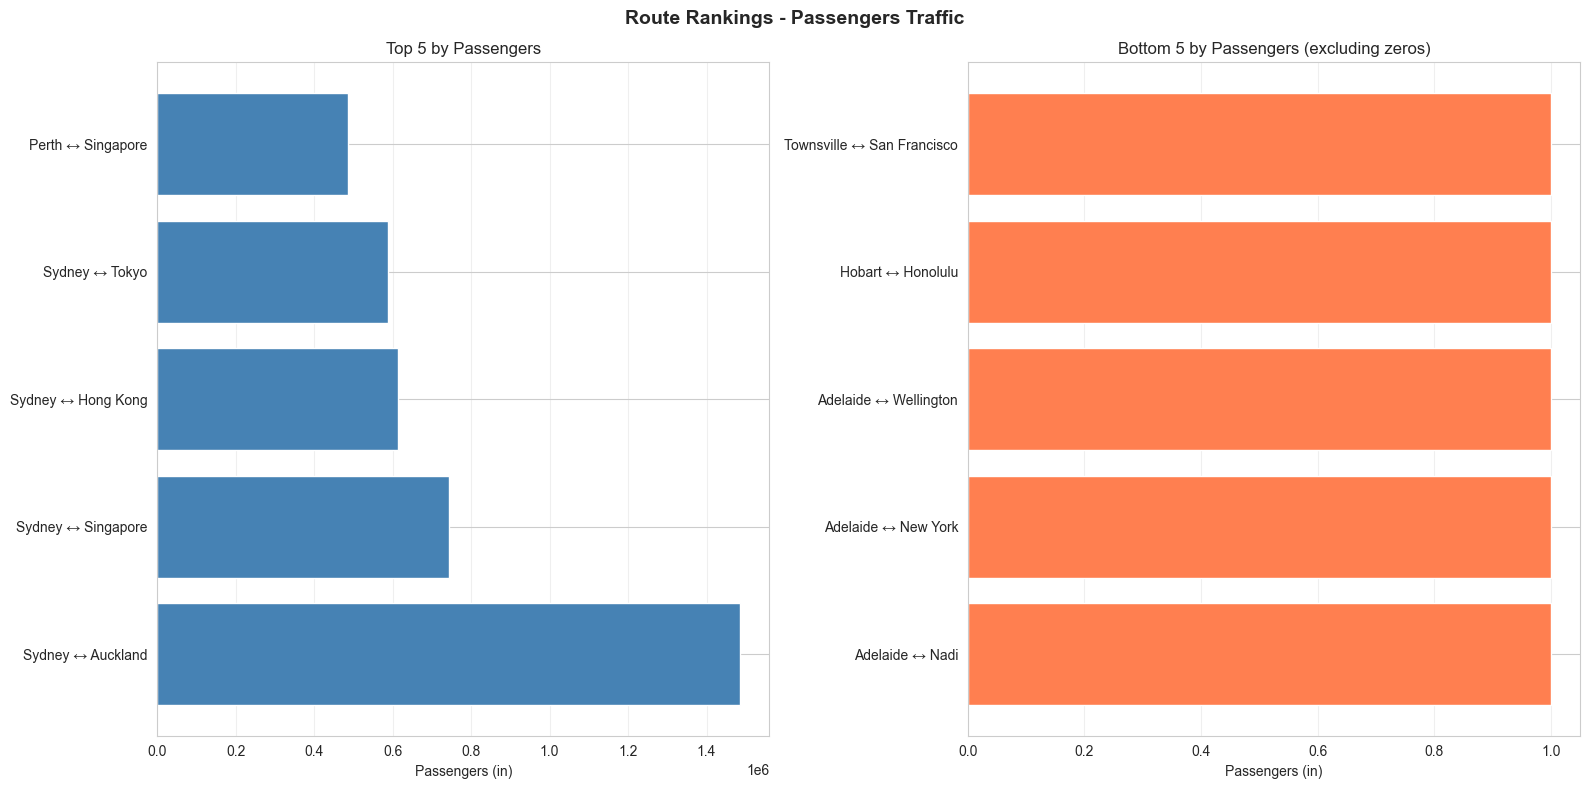

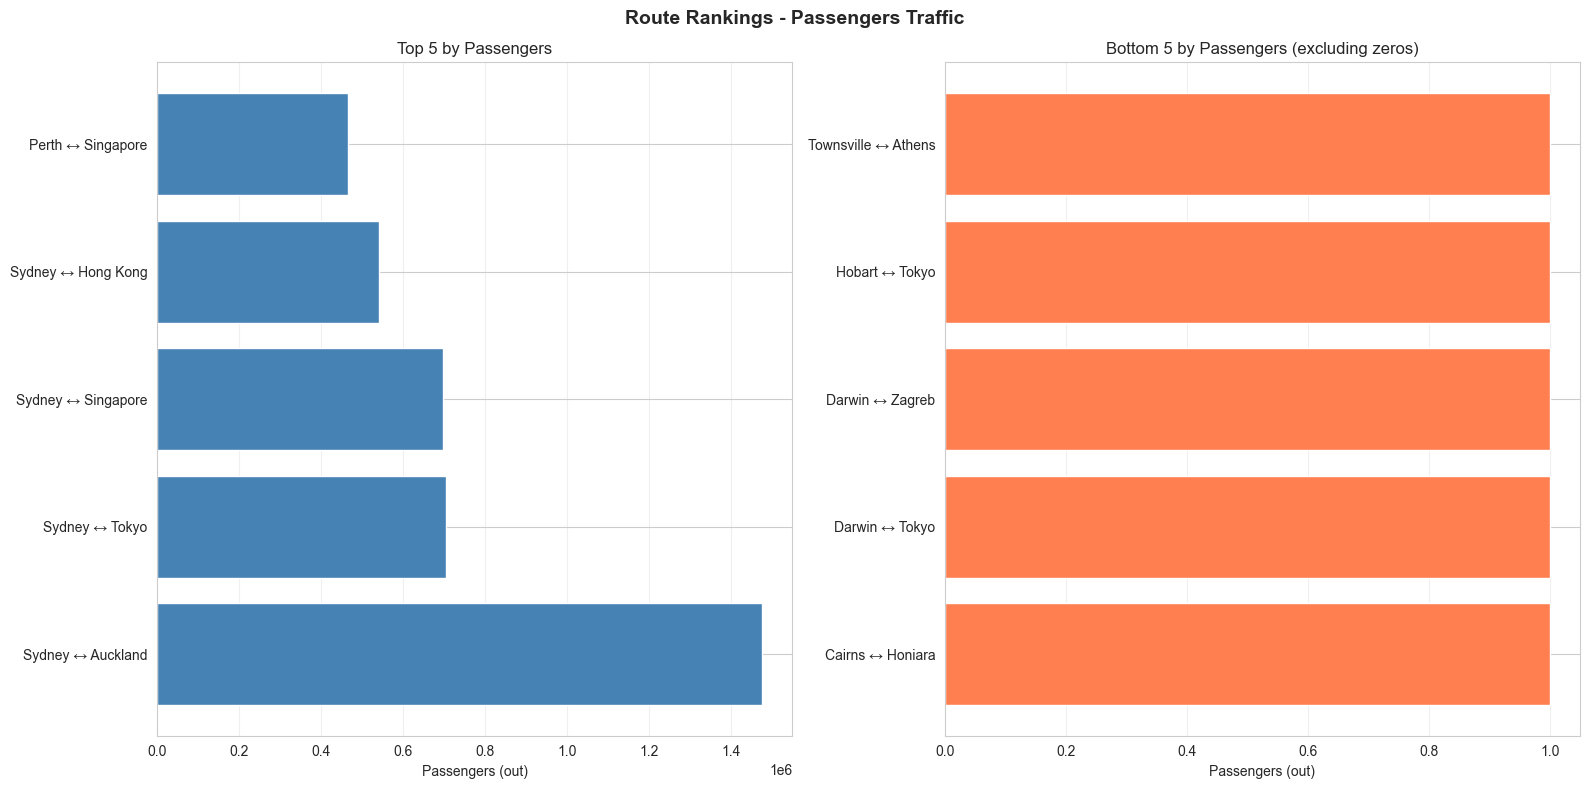

In [90]:
print("\nPASSENGER TRAFFIC ANALYSIS - ALL DIRECTIONS")
print("-"*100)

# Create comparison table for passengers
passenger_total = analyzer.analyze_ranking('passengers', 'total', 'route', 5, 5)
passenger_in = analyzer.analyze_ranking('passengers', 'in', 'route', 5, 5)
passenger_out = analyzer.analyze_ranking('passengers', 'out', 'route', 5, 5)

print("\nTop 5 Passenger Routes - Comparison:")
passenger_comparison = passenger_total['data']['top'][['AustralianPort', 'ForeignPort']].copy()
passenger_comparison['Total'] = passenger_total['data']['top']['Passengers_Total']

# Add in and out data
for idx, row in passenger_comparison.iterrows():
    route_data = airtraffic_df[
        (airtraffic_df['AustralianPort'] == row['AustralianPort']) & 
        (airtraffic_df['ForeignPort'] == row['ForeignPort'])
    ]
    passenger_comparison.loc[idx, 'Inbound'] = route_data['Passengers_In'].sum()
    passenger_comparison.loc[idx, 'Outbound'] = route_data['Passengers_Out'].sum()

passenger_comparison['Route'] = passenger_comparison['AustralianPort'] + ' ↔ ' + passenger_comparison['ForeignPort']
display(passenger_comparison[['Route', 'Inbound', 'Outbound', 'Total']])

print("\nBottom 5 Passenger Routes - Comparison:")
passenger_bottom_comparison = passenger_total['data']['bottom'][['AustralianPort', 'ForeignPort']].copy()
passenger_bottom_comparison['Total'] = passenger_total['data']['bottom']['Passengers_Total']

# Add in and out data for bottom routes
for idx, row in passenger_bottom_comparison.iterrows():
    route_data = airtraffic_df[
        (airtraffic_df['AustralianPort'] == row['AustralianPort']) & 
        (airtraffic_df['ForeignPort'] == row['ForeignPort'])
    ]
    passenger_bottom_comparison.loc[idx, 'Inbound'] = route_data['Passengers_In'].sum()
    passenger_bottom_comparison.loc[idx, 'Outbound'] = route_data['Passengers_Out'].sum()

passenger_bottom_comparison['Route'] = passenger_bottom_comparison['AustralianPort'] + ' ↔ ' + passenger_bottom_comparison['ForeignPort']
display(passenger_bottom_comparison[['Route', 'Inbound', 'Outbound', 'Total']])


FREIGHT TRAFFIC ANALYSIS - ALL DIRECTIONS
----------------------------------------------------------------------------------------------------

Top 5 Freight Routes - Comparison:


,Route,Inbound,Outbound,Total
228,Sydney ↔ Auckland,57440.857,69271.932,126712.789
281,Sydney ↔ Tokyo,33854.213,45301.715,79155.928
280,Sydney ↔ Singapore,32679.365,36633.039,69312.404
259,Sydney ↔ Los Angeles,53109.768,15620.850,68730.618
218,Perth ↔ Singapore,12545.204,41020.036,53565.240



Bottom 5 Freight Routes - Comparison:


,Route,Inbound,Outbound,Total
260,Sydney ↔ Malta,0.000,0.002,0.002
132,Hobart ↔ San Francisco,0.007,0.000,0.007
160,Melbourne ↔ Larnaca,0.000,0.009,0.009
23,Adelaide ↔ Nadi,0.000,0.012,0.012
33,Adelaide ↔ Zagreb,0.000,0.017,0.017


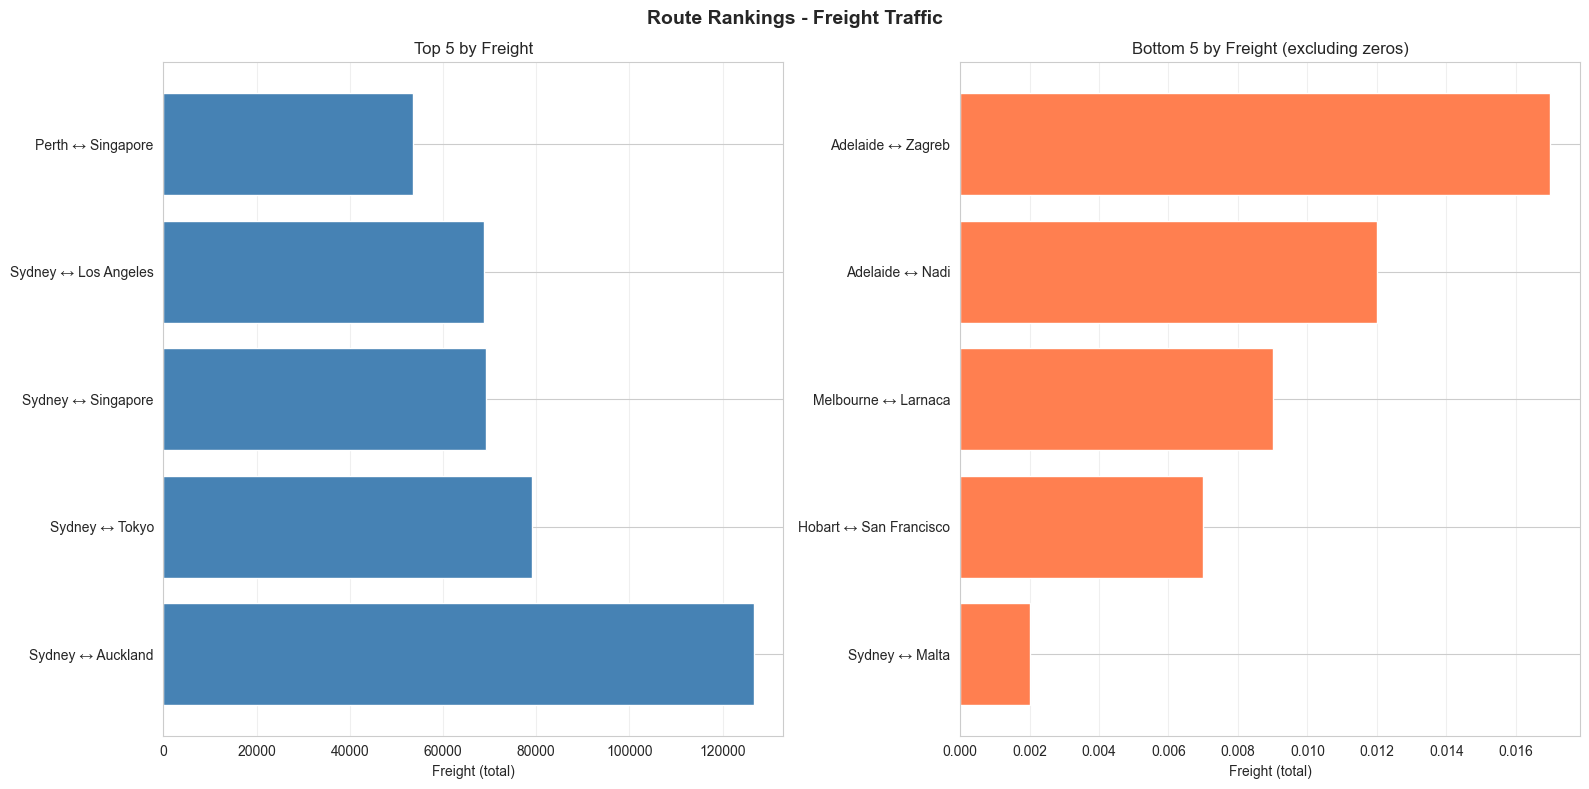

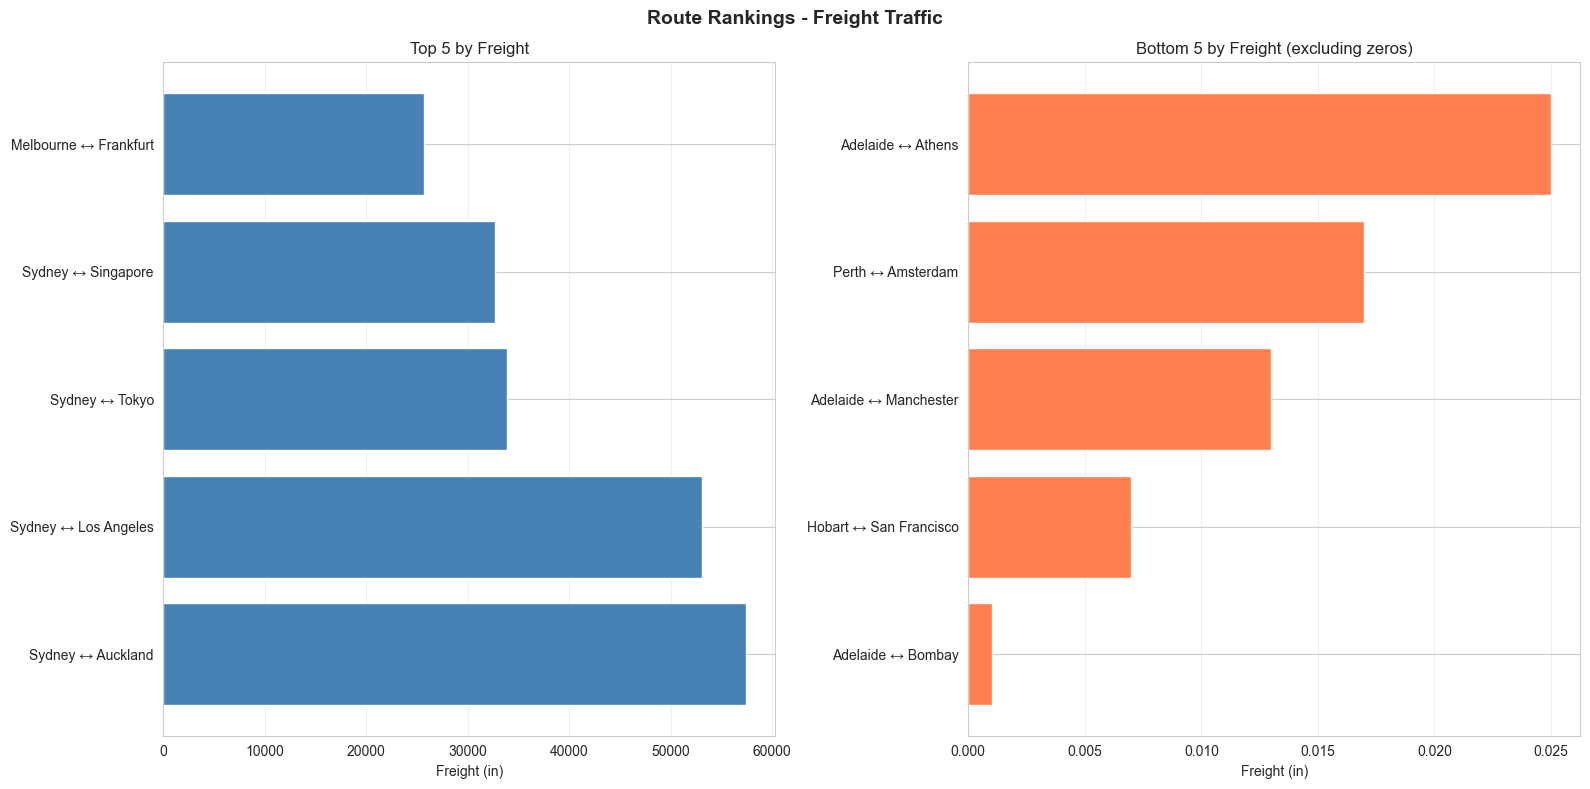

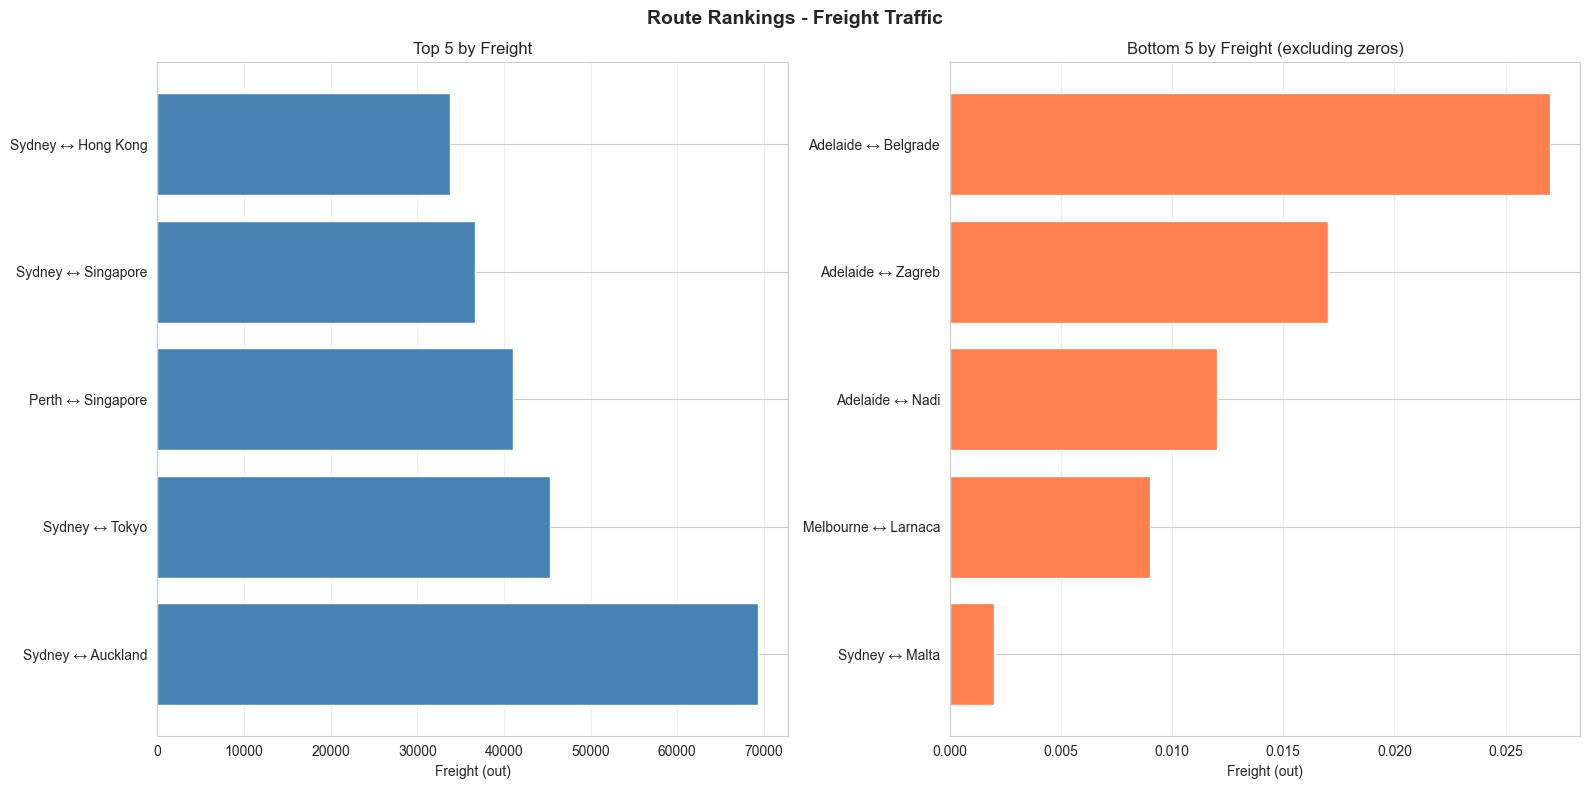

In [74]:
print("\nFREIGHT TRAFFIC ANALYSIS - ALL DIRECTIONS")
print("-"*100)

# Create comparison table for freight
freight_total = analyzer.analyze_ranking('freight', 'total', 'route', 5, 5)
freight_in = analyzer.analyze_ranking('freight', 'in', 'route', 5, 5)
freight_out = analyzer.analyze_ranking('freight', 'out', 'route', 5, 5)

print("\nTop 5 Freight Routes - Comparison:")
freight_comparison = freight_total['data']['top'][['AustralianPort', 'ForeignPort']].copy()
freight_comparison['Total'] = freight_total['data']['top']['Freight_Total_(tonnes)']

# Add in and out data
for idx, row in freight_comparison.iterrows():
    route_data = airtraffic_df[
        (airtraffic_df['AustralianPort'] == row['AustralianPort']) & 
        (airtraffic_df['ForeignPort'] == row['ForeignPort'])
    ]
    freight_comparison.loc[idx, 'Inbound'] = route_data['Freight_In_(tonnes)'].sum()
    freight_comparison.loc[idx, 'Outbound'] = route_data['Freight_Out_(tonnes)'].sum()

freight_comparison['Route'] = freight_comparison['AustralianPort'] + ' ↔ ' + freight_comparison['ForeignPort']
display(freight_comparison[['Route', 'Inbound', 'Outbound', 'Total']])

print("\nBottom 5 Freight Routes - Comparison:")
freight_bottom_comparison = freight_total['data']['bottom'][['AustralianPort', 'ForeignPort']].copy()
freight_bottom_comparison['Total'] = freight_total['data']['bottom']['Freight_Total_(tonnes)']

# Add in and out data for bottom routes
for idx, row in freight_bottom_comparison.iterrows():
    route_data = airtraffic_df[
        (airtraffic_df['AustralianPort'] == row['AustralianPort']) & 
        (airtraffic_df['ForeignPort'] == row['ForeignPort'])
    ]
    freight_bottom_comparison.loc[idx, 'Inbound'] = route_data['Freight_In_(tonnes)'].sum()
    freight_bottom_comparison.loc[idx, 'Outbound'] = route_data['Freight_Out_(tonnes)'].sum()

freight_bottom_comparison['Route'] = freight_bottom_comparison['AustralianPort'] + ' ↔ ' + freight_bottom_comparison['ForeignPort']
display(freight_bottom_comparison[['Route', 'Inbound', 'Outbound', 'Total']])


MAIL TRAFFIC ANALYSIS - ALL DIRECTIONS
----------------------------------------------------------------------------------------------------

Top 5 Mail Routes - Comparison:


,Route,Inbound,Outbound,Total
228,Sydney ↔ Auckland,678.529,2602.248,3280.777
258,Sydney ↔ London,824.293,1884.976,2709.269
281,Sydney ↔ Tokyo,1571.223,852.413,2423.636
278,Sydney ↔ San Francisco,308.044,1819.071,2127.115
162,Melbourne ↔ London,467.379,1313.325,1780.704



Bottom 5 Mail Routes - Comparison:


,Route,Inbound,Outbound,Total
289,Townsville ↔ Auckland,0.000,0.005,0.005
118,Darwin ↔ Kupang,0.006,0.000,0.006
13,Adelaide ↔ Harare,0.000,0.009,0.009
43,Brisbane ↔ Chicago,0.009,0.000,0.009
33,Adelaide ↔ Zagreb,0.000,0.009,0.009


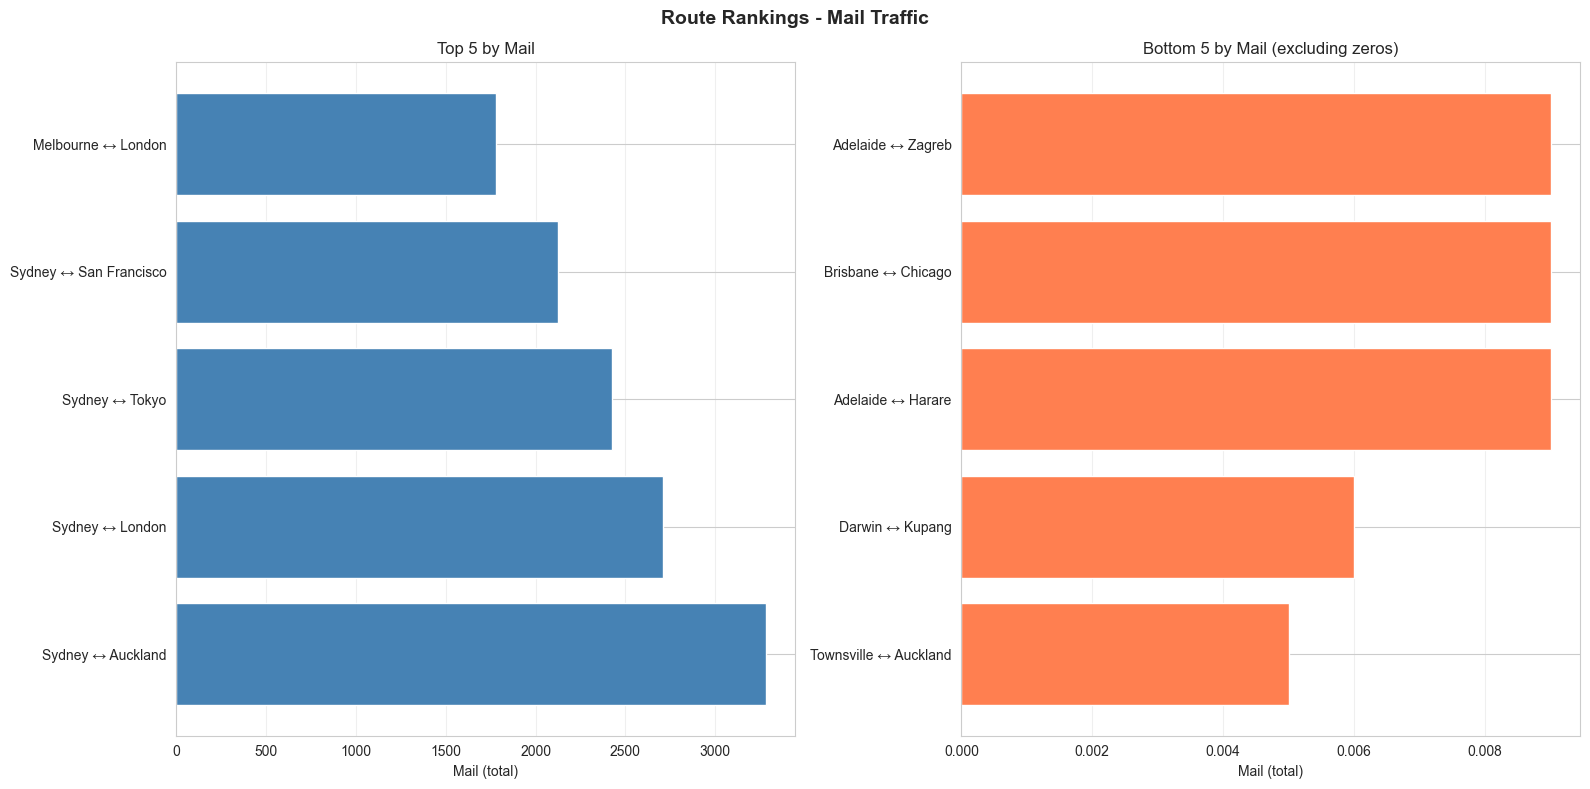

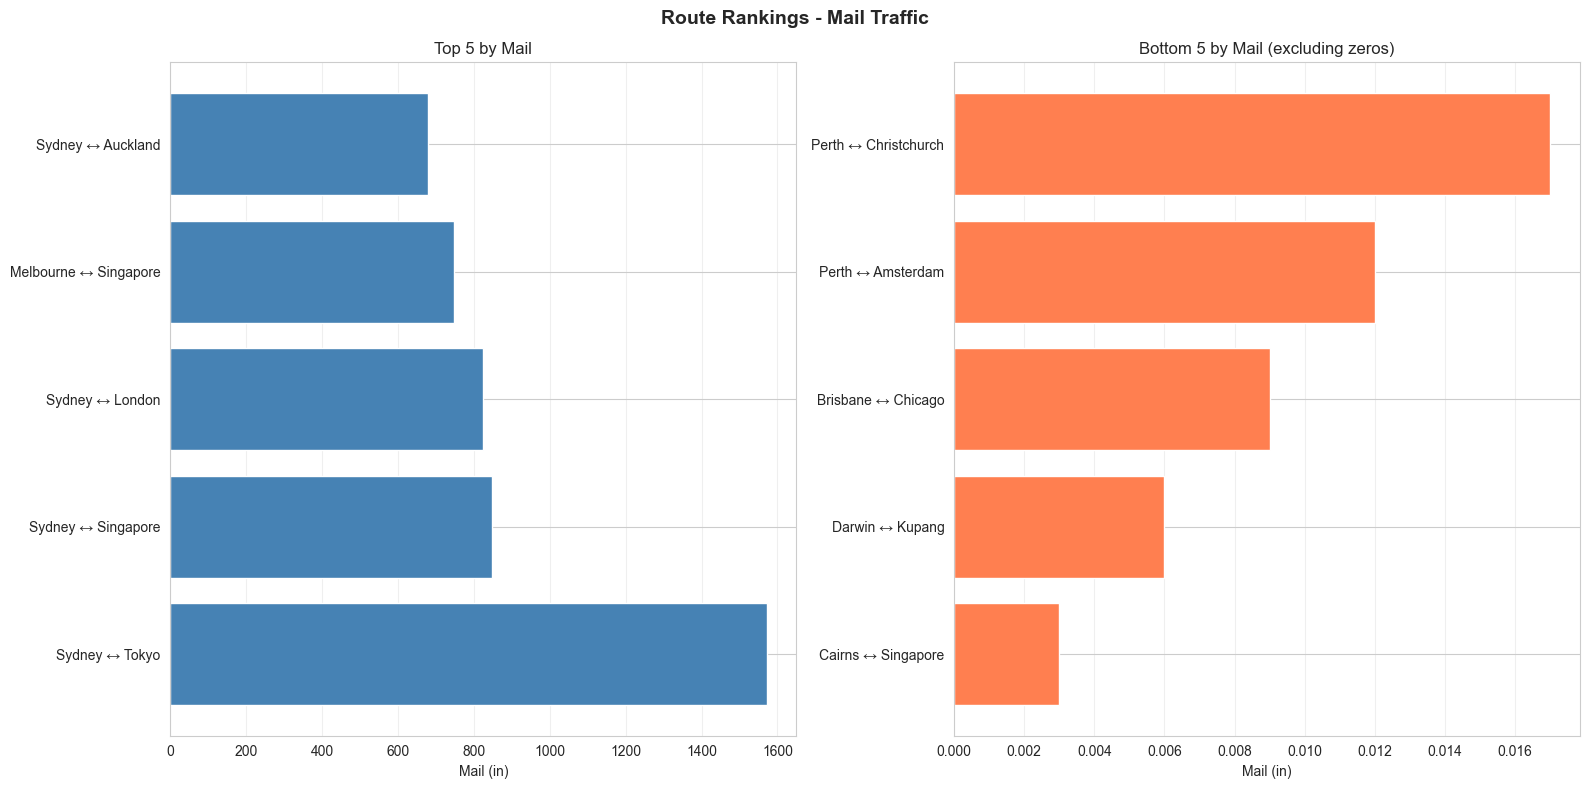

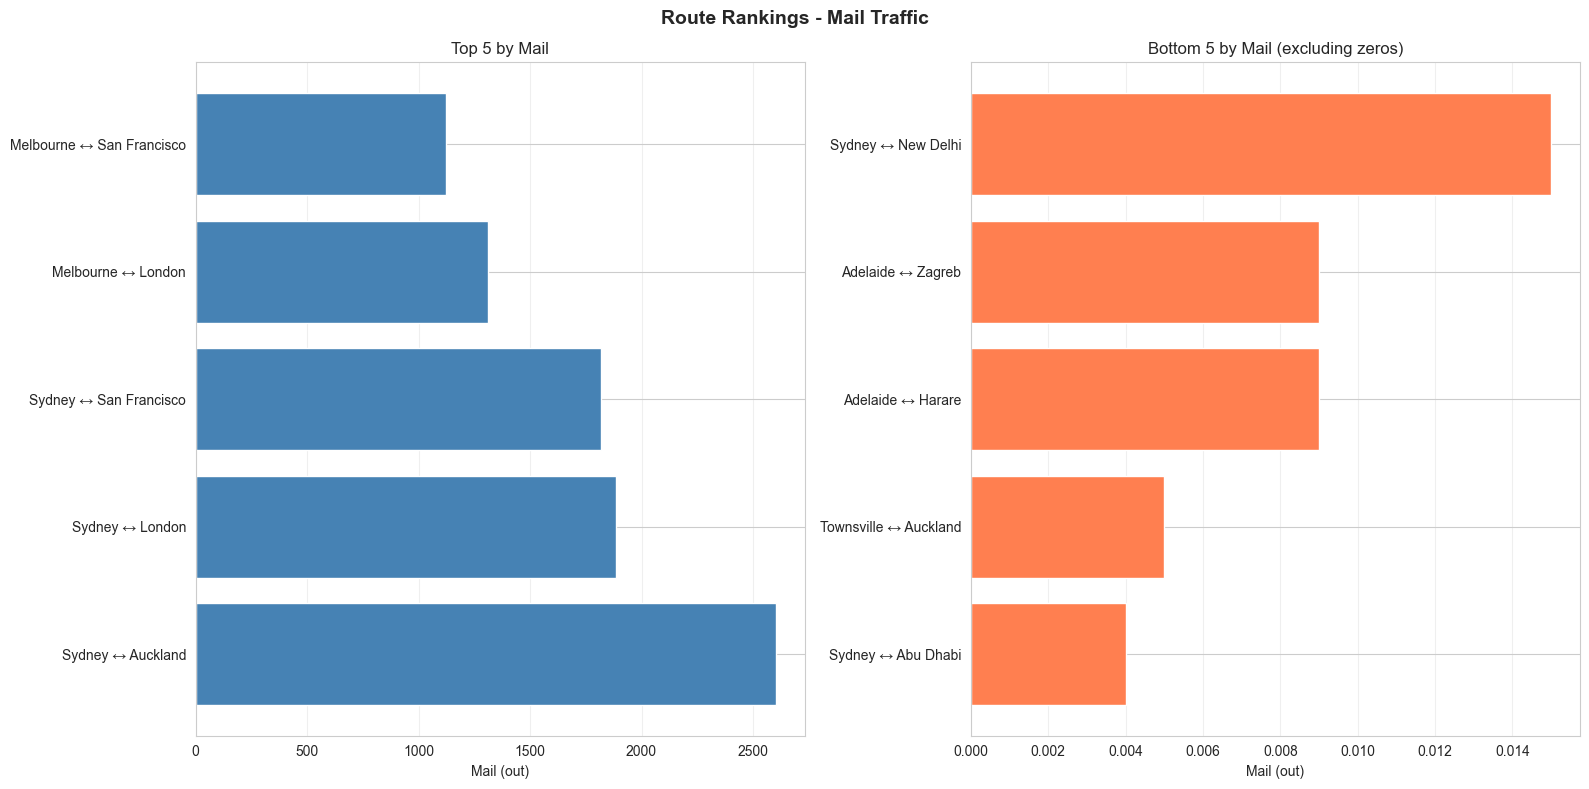

In [75]:
print("\nMAIL TRAFFIC ANALYSIS - ALL DIRECTIONS")
print("-"*100)

# Create comparison table for mail
mail_total = analyzer.analyze_ranking('mail', 'total', 'route', 5, 5)
mail_in = analyzer.analyze_ranking('mail', 'in', 'route', 5, 5)
mail_out = analyzer.analyze_ranking('mail', 'out', 'route', 5, 5)

print("\nTop 5 Mail Routes - Comparison:")
mail_comparison = mail_total['data']['top'][['AustralianPort', 'ForeignPort']].copy()
mail_comparison['Total'] = mail_total['data']['top']['Mail_Total_(tonnes)']

# Add in and out data
for idx, row in mail_comparison.iterrows():
    route_data = airtraffic_df[
        (airtraffic_df['AustralianPort'] == row['AustralianPort']) & 
        (airtraffic_df['ForeignPort'] == row['ForeignPort'])
    ]
    mail_comparison.loc[idx, 'Inbound'] = route_data['Mail_In_(tonnes)'].sum()
    mail_comparison.loc[idx, 'Outbound'] = route_data['Mail_Out_(tonnes)'].sum()

mail_comparison['Route'] = mail_comparison['AustralianPort'] + ' ↔ ' + mail_comparison['ForeignPort']
display(mail_comparison[['Route', 'Inbound', 'Outbound', 'Total']])

print("\nBottom 5 Mail Routes - Comparison:")
mail_bottom_comparison = mail_total['data']['bottom'][['AustralianPort', 'ForeignPort']].copy()
mail_bottom_comparison['Total'] = mail_total['data']['bottom']['Mail_Total_(tonnes)']

# Add in and out data for bottom routes
for idx, row in mail_bottom_comparison.iterrows():
    route_data = airtraffic_df[
        (airtraffic_df['AustralianPort'] == row['AustralianPort']) & 
        (airtraffic_df['ForeignPort'] == row['ForeignPort'])
    ]
    mail_bottom_comparison.loc[idx, 'Inbound'] = route_data['Mail_In_(tonnes)'].sum()
    mail_bottom_comparison.loc[idx, 'Outbound'] = route_data['Mail_Out_(tonnes)'].sum()

mail_bottom_comparison['Route'] = mail_bottom_comparison['AustralianPort'] + ' ↔ ' + mail_bottom_comparison['ForeignPort']
display(mail_bottom_comparison[['Route', 'Inbound', 'Outbound', 'Total']])


PASSENGER TEMPORAL TRENDS ANALYSIS
----------------------------------------------------------------------------------------------------

Monthly Passenger Traffic Trends:


,Month_dt,Passengers_Total,MoM_Growth,3M_MA
43,1988-08-01,679612,-1.047746,651948.666667
44,1988-09-01,695302,2.308670,687240.666667
45,1988-10-01,705324,1.441388,693412.666667
46,1988-11-01,653745,-7.312809,684790.333333
47,1988-12-01,726946,11.197179,695338.333333
48,1989-01-01,759105,4.423850,713265.333333
49,1989-02-01,605516,-20.232906,697189.000000
50,1989-03-01,652597,7.775352,672406.000000
51,1989-04-01,614561,-5.828406,624224.666667
52,1989-05-01,554201,-9.821645,607119.666667



Key Metrics:
  Monthly Growth Rate: 0.75%
  Total Period Growth: -97.4%
  Volatility (CV): 0.22


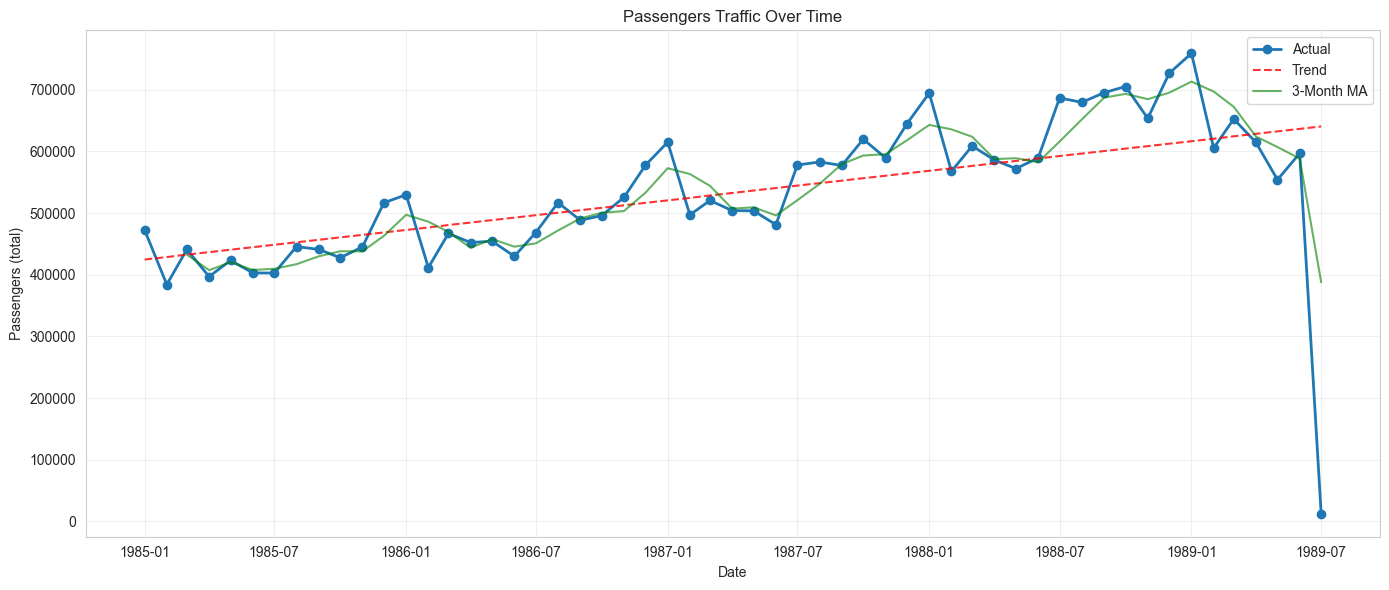

In [76]:
print("\nPASSENGER TEMPORAL TRENDS ANALYSIS")
print("-"*100)

# Overall traffic trends over time
temporal_result = analyzer.analyze_temporal('passengers', 'total', groupby_level='total')

print("\nMonthly Passenger Traffic Trends:")
display(temporal_result['data'][['Month_dt', 'Passengers_Total', 'MoM_Growth', '3M_MA']].tail(12))

print("\nKey Metrics:")
print(f"  Monthly Growth Rate: {temporal_result['statistics']['trend_pct_monthly']:.2f}%")
print(f"  Total Period Growth: {((temporal_result['statistics']['end_value'] - temporal_result['statistics']['start_value']) / temporal_result['statistics']['start_value'] * 100):.1f}%")
print(f"  Volatility (CV): {temporal_result['statistics']['cv']:.2f}")


FREIGHT TEMPORAL TRENDS ANALYSIS
----------------------------------------------------------------------------------------------------

Monthly Freight Traffic Trends:


,Month_dt,Freight_Total_(tonnes),MoM_Growth,3M_MA
43,1988-08-01,25355.853,2.239248,24702.435667
44,1988-09-01,26331.085,3.846181,25495.815333
45,1988-10-01,28003.948,6.353187,26563.628667
46,1988-11-01,29603.212,5.710852,27979.415000
47,1988-12-01,28892.262,-2.401598,28833.140667
48,1989-01-01,22553.034,-21.940920,27016.169333
49,1989-02-01,27006.934,19.748562,26150.743333
50,1989-03-01,29718.153,10.038974,26426.040333
51,1989-04-01,27454.628,-7.616641,28059.905000
52,1989-05-01,28188.018,2.671280,28453.599667



Key Metrics:
  Monthly Growth Rate: 0.61%
  Total Period Growth: -95.8%
  Volatility (CV): 0.20


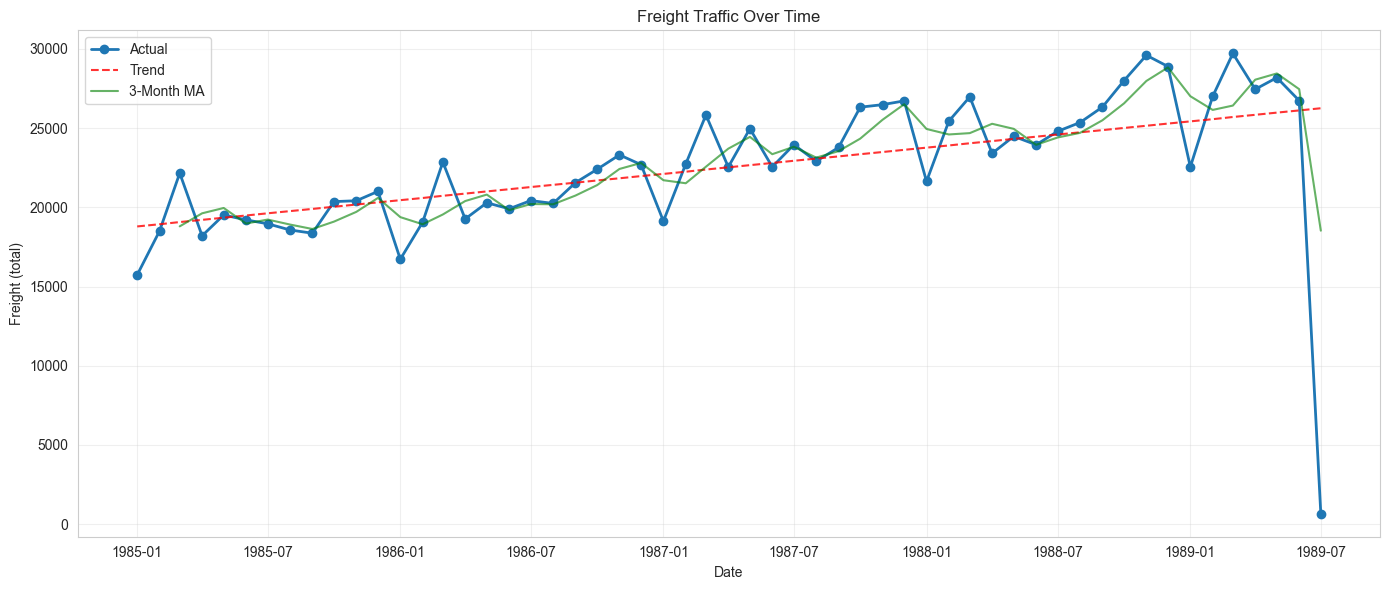

In [77]:
print("\nFREIGHT TEMPORAL TRENDS ANALYSIS")
print("-"*100)

# Overall traffic trends over time
temporal_result = analyzer.analyze_temporal('freight', 'total', groupby_level='total')

print("\nMonthly Freight Traffic Trends:")
display(temporal_result['data'][['Month_dt', 'Freight_Total_(tonnes)', 'MoM_Growth', '3M_MA']].tail(12))

print("\nKey Metrics:")
print(f"  Monthly Growth Rate: {temporal_result['statistics']['trend_pct_monthly']:.2f}%")
print(f"  Total Period Growth: {((temporal_result['statistics']['end_value'] - temporal_result['statistics']['start_value']) / temporal_result['statistics']['start_value'] * 100):.1f}%")
print(f"  Volatility (CV): {temporal_result['statistics']['cv']:.2f}")


MAIL TEMPORAL TRENDS ANALYSIS
----------------------------------------------------------------------------------------------------

Monthly Freight Traffic Trends:


,Month_dt,Mail_Total_(tonnes),MoM_Growth,3M_MA
43,1988-08-01,1172.527,3.789628,920.539667
44,1988-09-01,1130.189,-3.610834,1144.143667
45,1988-10-01,1238.341,9.569373,1180.352333
46,1988-11-01,1411.164,13.956011,1259.898000
47,1988-12-01,2063.871,46.253093,1571.125333
48,1989-01-01,1092.632,-47.059094,1522.555667
49,1989-02-01,1125.773,3.033135,1427.425333
50,1989-03-01,1326.033,17.788666,1181.479333
51,1989-04-01,1193.903,-9.964307,1215.236333
52,1989-05-01,1197.744,0.321718,1239.226667



Key Metrics:
  Monthly Growth Rate: 2.65%
  Total Period Growth: -94.7%
  Volatility (CV): 0.64


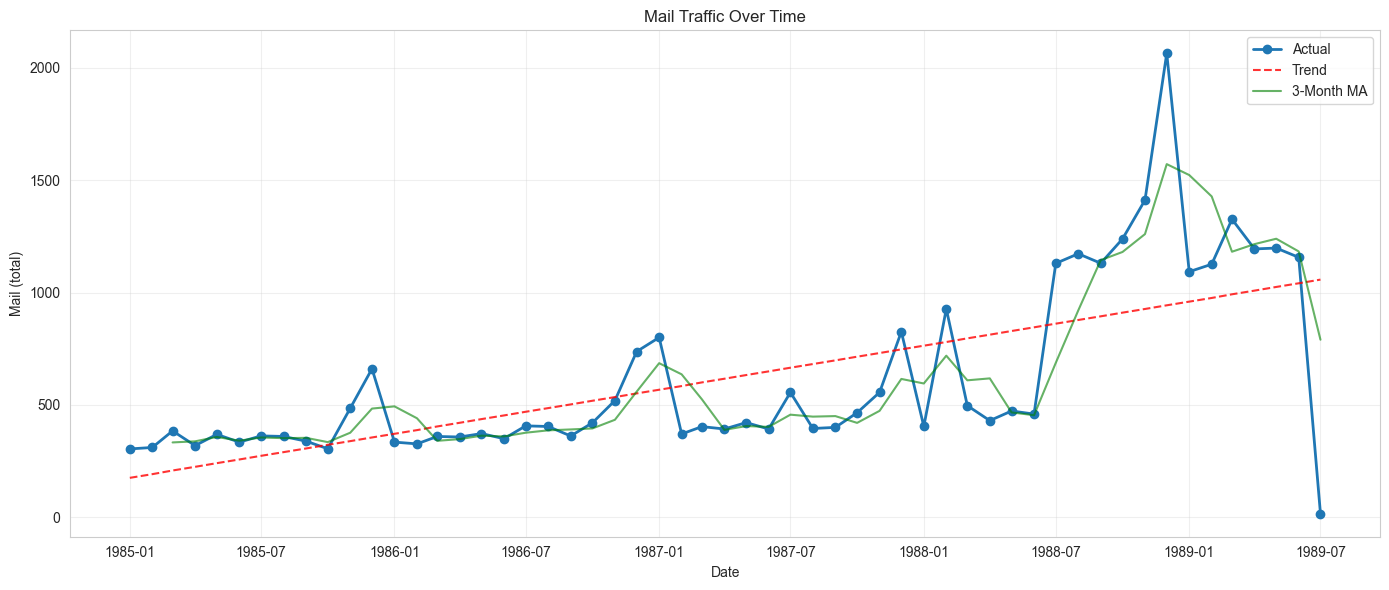

In [78]:
print("\nMAIL TEMPORAL TRENDS ANALYSIS")
print("-"*100)

# Overall traffic trends over time
temporal_result = analyzer.analyze_temporal('mail', 'total', groupby_level='total')

print("\nMonthly Freight Traffic Trends:")
display(temporal_result['data'][['Month_dt', 'Mail_Total_(tonnes)', 'MoM_Growth', '3M_MA']].tail(12))

print("\nKey Metrics:")
print(f"  Monthly Growth Rate: {temporal_result['statistics']['trend_pct_monthly']:.2f}%")
print(f"  Total Period Growth: {((temporal_result['statistics']['end_value'] - temporal_result['statistics']['start_value']) / temporal_result['statistics']['start_value'] * 100):.1f}%")
print(f"  Volatility (CV): {temporal_result['statistics']['cv']:.2f}")


PASSENGER SEASONAL PATTERNS ANALYSIS
----------------------------------------------------------------------------------------------------

Average Traffic by Month:


,Month,Passengers_Total
0,Jan,3360.165208
1,Feb,2698.513129
2,Mar,2927.134929
3,Apr,2764.102814
4,May,2725.891304
5,Jun,2709.085590
6,Jul,2823.403417
7,Aug,3048.400000
8,Sep,3033.201102
9,Oct,2982.477454


Seasonality Metrics:
  Peak Month: Jan
  Trough Month: Feb
  Seasonal Strength: 22.5%


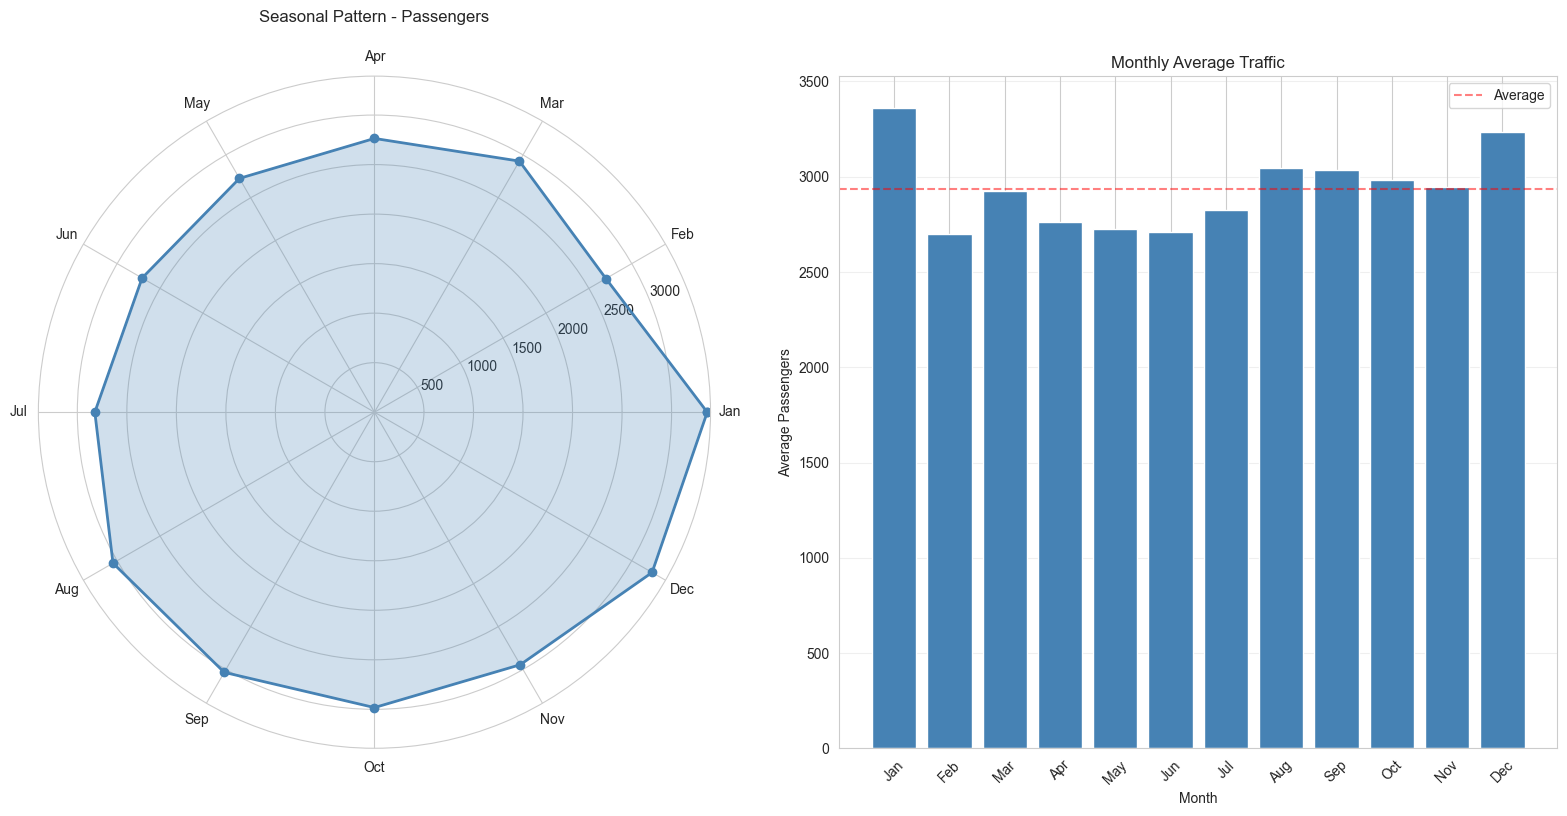

In [79]:
print("\nPASSENGER SEASONAL PATTERNS ANALYSIS")
print("-"*100)

seasonal_result = analyzer.analyze_seasonal('passengers', 'total', 'total')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_df = seasonal_result['data'].copy()
seasonal_df['Month'] = [month_names[i-1] for i in seasonal_df['Month_Num']]

print("\nAverage Traffic by Month:")
display(seasonal_df[['Month', 'Passengers_Total']])

print("Seasonality Metrics:")
print(f"  Peak Month: {month_names[seasonal_result['statistics']['peak_month']-1]}")
print(f"  Trough Month: {month_names[seasonal_result['statistics']['trough_month']-1]}")
print(f"  Seasonal Strength: {seasonal_result['statistics']['seasonal_strength']:.1%}")


FREIGHT SEASONAL PATTERNS ANALYSIS
----------------------------------------------------------------------------------------------------

Average Traffic by Month:


,Month,Freight_Total_(tonnes)
0,Jan,104.788128
1,Feb,123.363842
2,Mar,138.781721
3,Apr,119.995877
4,May,127.651972
5,Jun,121.729598
6,Jul,116.682447
7,Aug,119.286129
8,Sep,124.012427
9,Oct,128.762789


Seasonality Metrics:
  Peak Month: Mar
  Trough Month: Jan
  Seasonal Strength: 27.4%


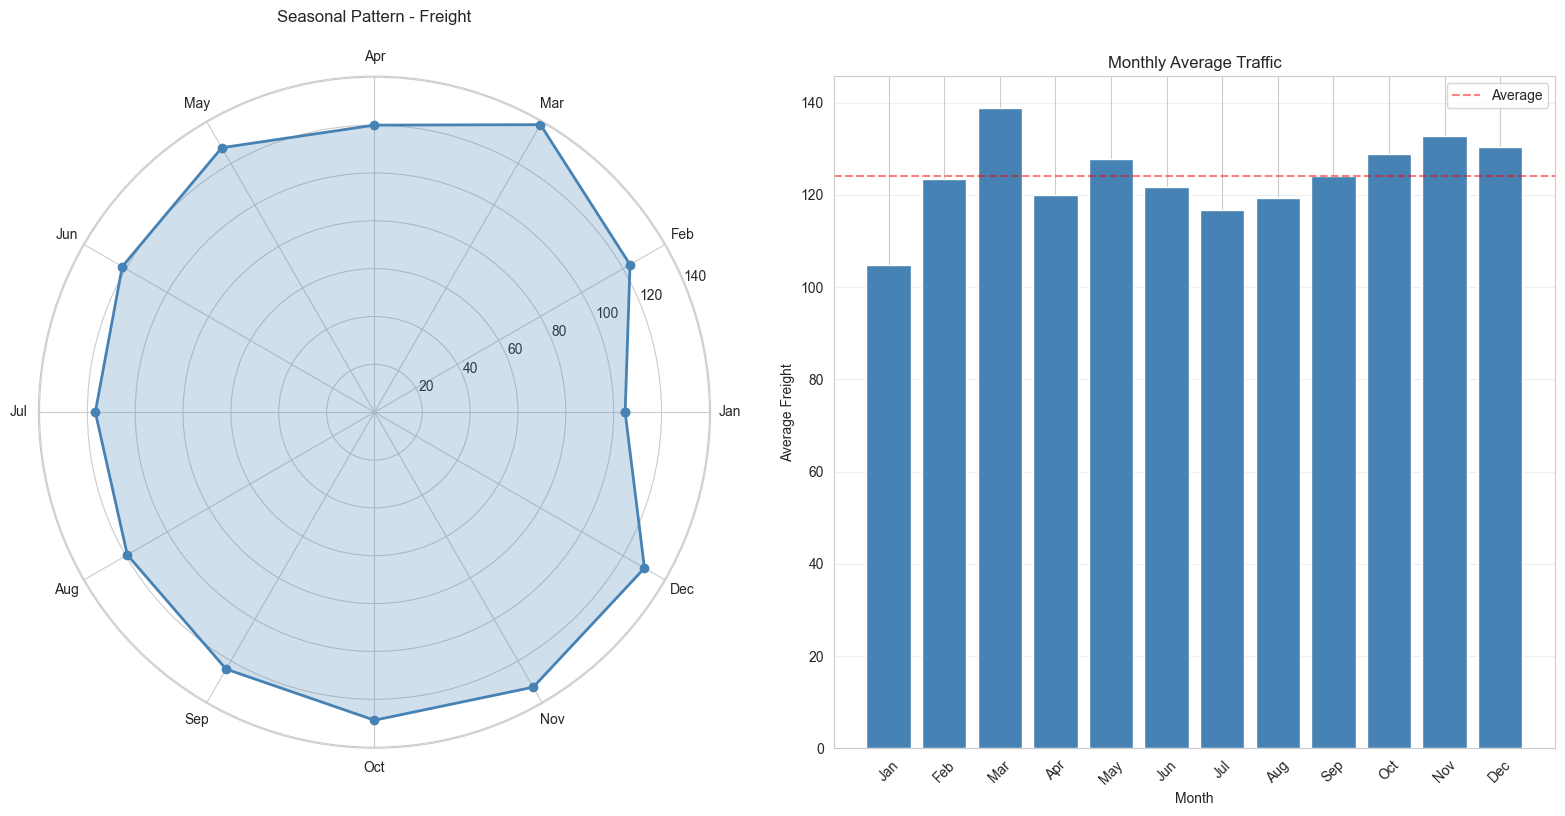

In [80]:
print("\nFREIGHT SEASONAL PATTERNS ANALYSIS")
print("-"*100)

seasonal_result = analyzer.analyze_seasonal('freight', 'total', 'total')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_df = seasonal_result['data'].copy()
seasonal_df['Month'] = [month_names[i-1] for i in seasonal_df['Month_Num']]

print("\nAverage Traffic by Month:")
display(seasonal_df[['Month', 'Freight_Total_(tonnes)']])

print("Seasonality Metrics:")
print(f"  Peak Month: {month_names[seasonal_result['statistics']['peak_month']-1]}")
print(f"  Trough Month: {month_names[seasonal_result['statistics']['trough_month']-1]}")
print(f"  Seasonal Strength: {seasonal_result['statistics']['seasonal_strength']:.1%}")


MAIL SEASONAL PATTERNS ANALYSIS
----------------------------------------------------------------------------------------------------

Average Traffic by Month:


,Month,Mail_Total_(tonnes)
0,Jan,3.212349
1,Feb,3.349196
2,Mar,3.232168
3,Apr,2.914915
4,May,3.080140
5,Jun,2.917694
6,Jul,3.246549
7,Aug,3.194003
8,Sep,3.072817
9,Oct,3.221511


Seasonality Metrics:
  Peak Month: Dec
  Trough Month: Apr
  Seasonal Strength: 79.3%


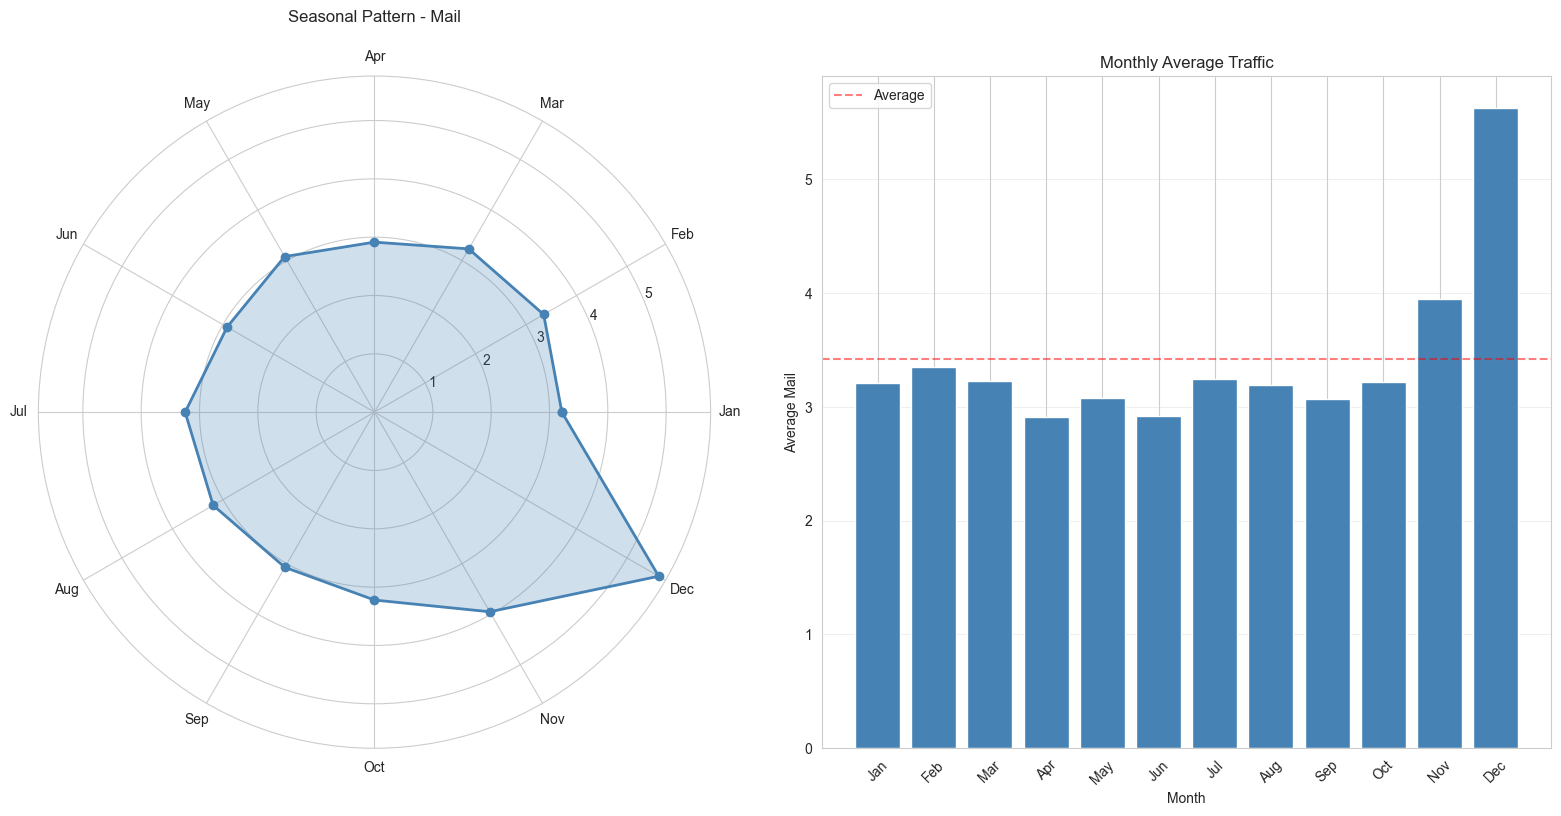

In [81]:
print("\nMAIL SEASONAL PATTERNS ANALYSIS")
print("-"*100)

seasonal_result = analyzer.analyze_seasonal('mail', 'total', 'total')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_df = seasonal_result['data'].copy()
seasonal_df['Month'] = [month_names[i-1] for i in seasonal_df['Month_Num']]

print("\nAverage Traffic by Month:")
display(seasonal_df[['Month', 'Mail_Total_(tonnes)']])

print("Seasonality Metrics:")
print(f"  Peak Month: {month_names[seasonal_result['statistics']['peak_month']-1]}")
print(f"  Trough Month: {month_names[seasonal_result['statistics']['trough_month']-1]}")
print(f"  Seasonal Strength: {seasonal_result['statistics']['seasonal_strength']:.1%}")


PASSENGER GEOGRAPHICAL PATTERNS ANALYSIS
----------------------------------------------------------------------------------------------------

Top 10 Countries by Passenger Traffic:


,Label,Passengers_Total,% of Total
26,New Zealand,7881613,41.292935
30,Singapore,4130761,21.641667
37,USA,3084101,16.158061
15,Hong Kong,2217453,11.617564
19,Japan,1773146,9.289774



Australian Port Hub Analysis:


,Label,Passengers_Total
9,Sydney,15499688
5,Melbourne,6180004
1,Brisbane,3153897
7,Perth,2811590
0,Adelaide,604937


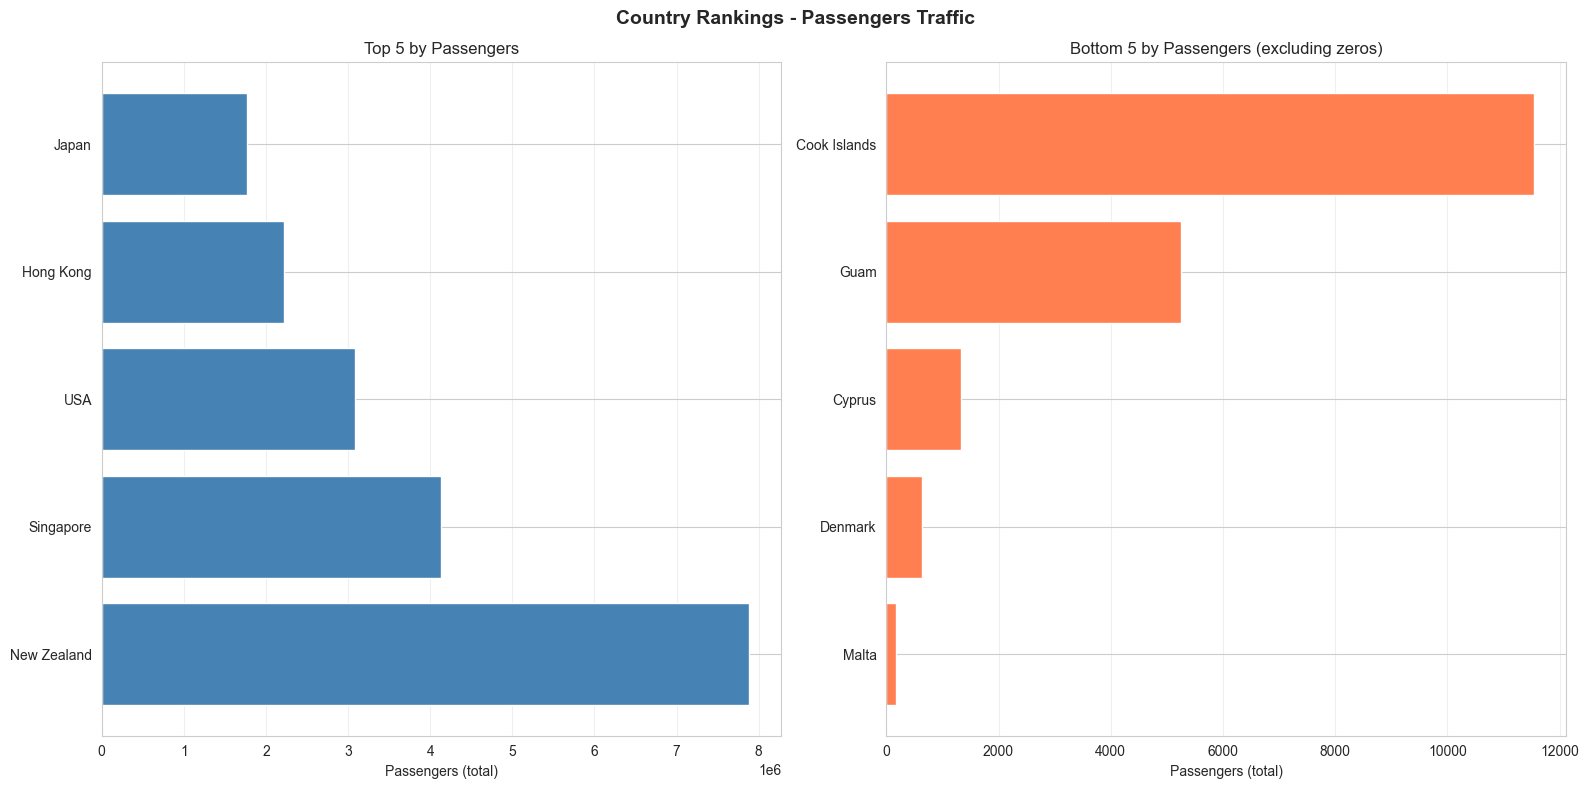

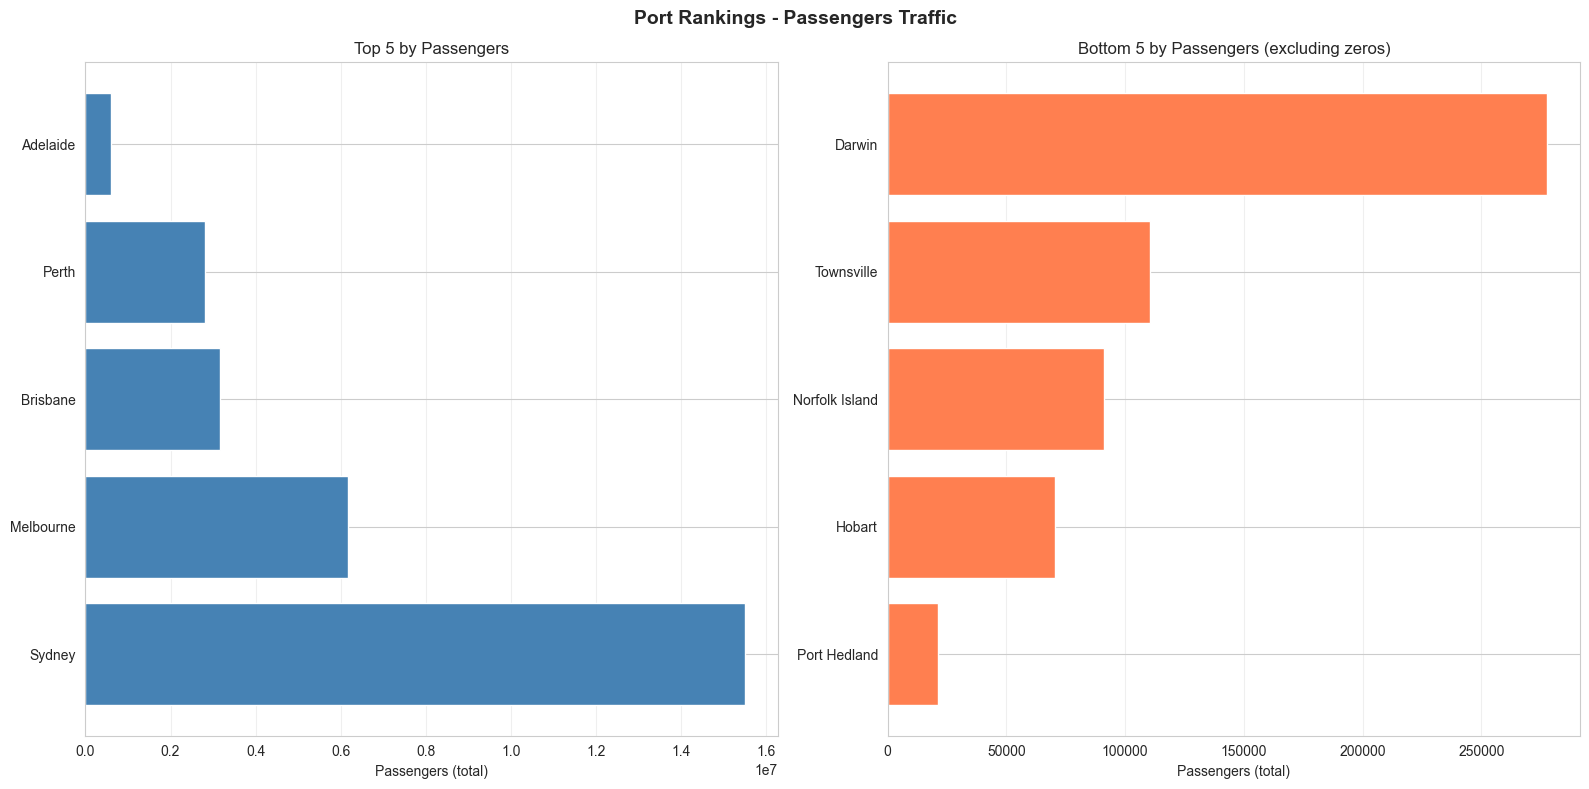

In [82]:
print("\nPASSENGER GEOGRAPHICAL PATTERNS ANALYSIS")
print("-"*100)

# By Country
country_result = analyzer.analyze_ranking('passengers', 'total', 'country', 5, 5)

print("\nTop 10 Countries by Passenger Traffic:")
country_df = country_result['data']['top'].copy()
country_df['% of Total'] = (country_df['Passengers_Total'] / country_df['Passengers_Total'].sum() * 100)
display(country_df[['Label', 'Passengers_Total', '% of Total']])

# By Australian Port
port_result = analyzer.analyze_ranking('passengers', 'total', 'port', 5, 5)

print("\nAustralian Port Hub Analysis:")
display(port_result['data']['top'][['Label', 'Passengers_Total']])


FREIGHT GEOGRAPHICAL PATTERNS ANALYSIS
----------------------------------------------------------------------------------------------------

Top 10 Countries by Freight Traffic:


,Label,Freight_Total_(tonnes),% of Total
26,New Zealand,286306.926,33.153348
30,Singapore,212123.157,24.563125
37,USA,163477.852,18.930168
15,Hong Kong,103011.734,11.928401
19,Japan,98664.076,11.424958



Australian Port Hub Analysis:


,Label,Freight_Total_(tonnes)
9,Sydney,677625.929
5,Melbourne,345111.909
7,Perth,97447.587
1,Brisbane,80835.797
0,Adelaide,25918.313


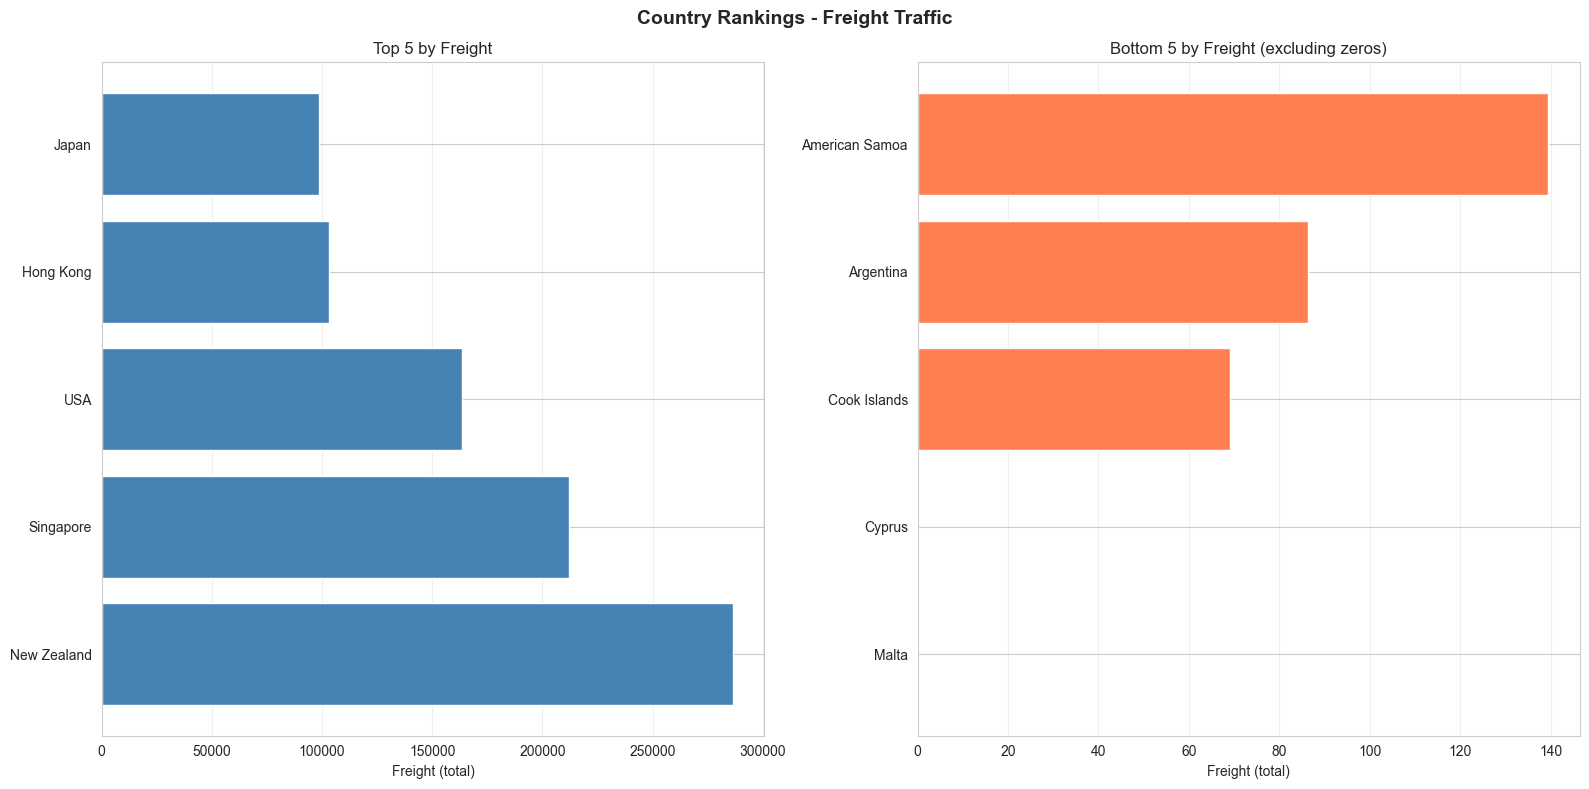

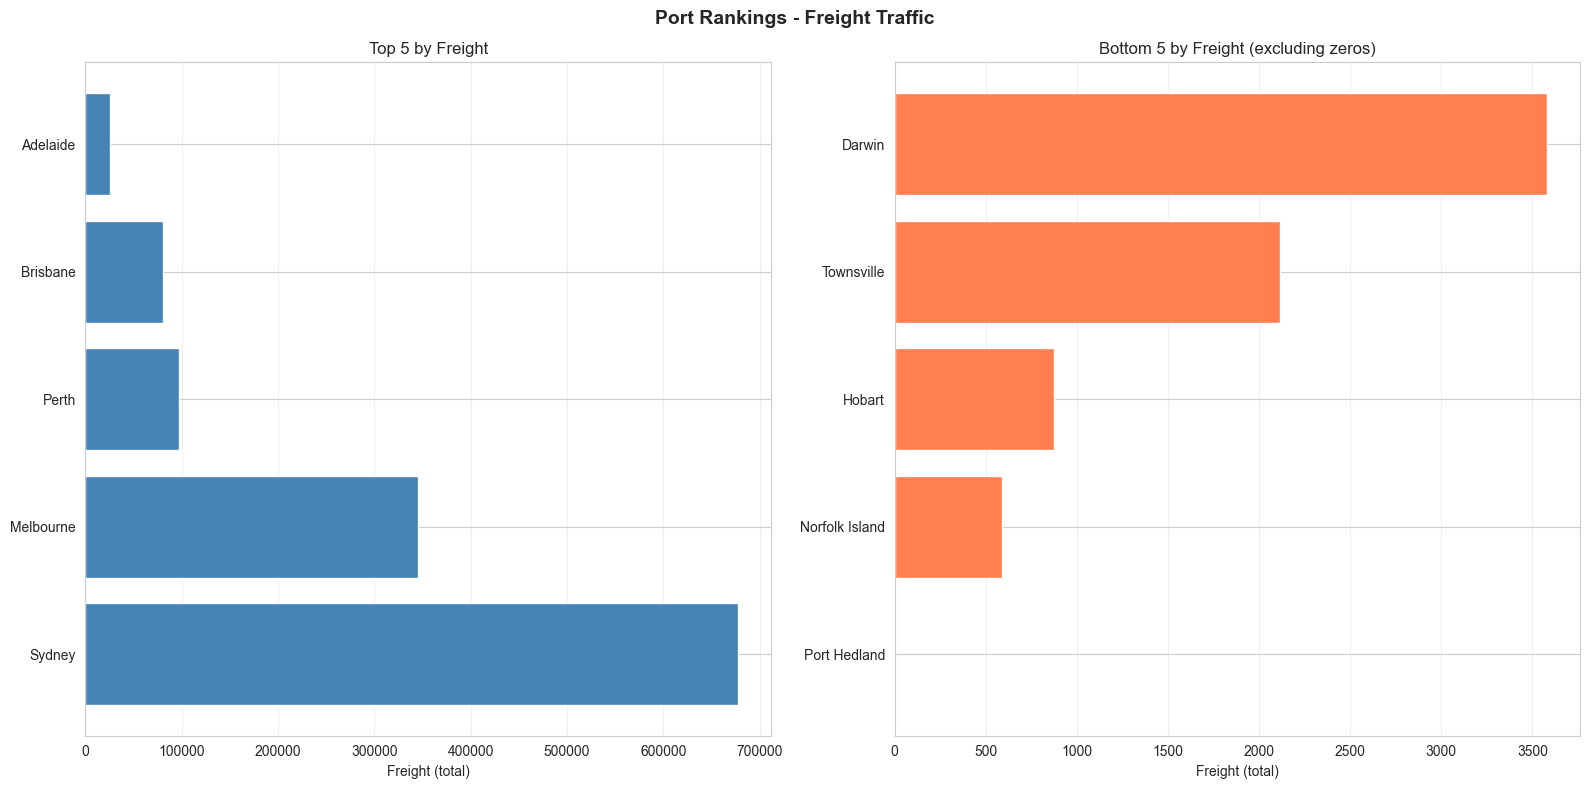

In [83]:
print("\nFREIGHT GEOGRAPHICAL PATTERNS ANALYSIS")
print("-"*100)

# By Country
country_result = analyzer.analyze_ranking('freight', 'total', 'country', 5, 5)

print("\nTop 10 Countries by Freight Traffic:")
country_df = country_result['data']['top'].copy()
country_df['% of Total'] = (country_df['Freight_Total_(tonnes)'] / country_df['Freight_Total_(tonnes)'].sum() * 100)
display(country_df[['Label', 'Freight_Total_(tonnes)', '% of Total']])

# By Australian Port (Hub Analysis)
port_result = analyzer.analyze_ranking('freight', 'total', 'port', 5, 5)

print("\nAustralian Port Hub Analysis:")
display(port_result['data']['top'][['Label', 'Freight_Total_(tonnes)']])


MAIL GEOGRAPHICAL PATTERNS ANALYSIS
----------------------------------------------------------------------------------------------------

Top 10 Countries by Mail Traffic:


,Label,Mail_Total_(tonnes),% of Total
26,New Zealand,6326.119,26.425819
36,UK,6069.305,25.353041
37,USA,5405.194,22.578879
19,Japan,3384.111,14.136298
30,Singapore,2754.431,11.505963



Australian Port Hub Analysis:


,Label,Mail_Total_(tonnes)
9,Sydney,20120.870
5,Melbourne,9457.443
1,Brisbane,2162.415
7,Perth,1556.005
0,Adelaide,498.896


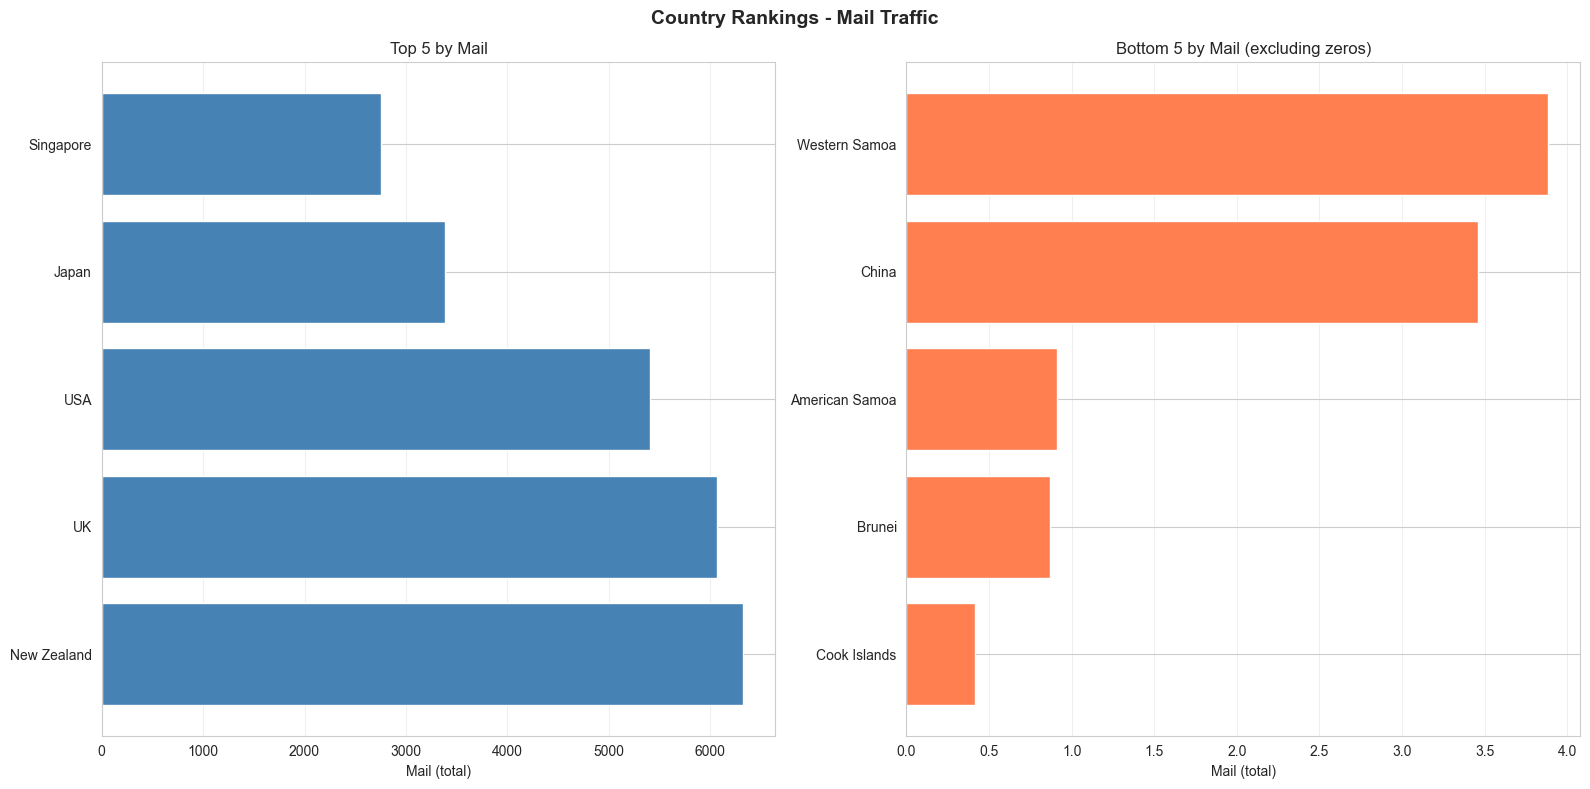

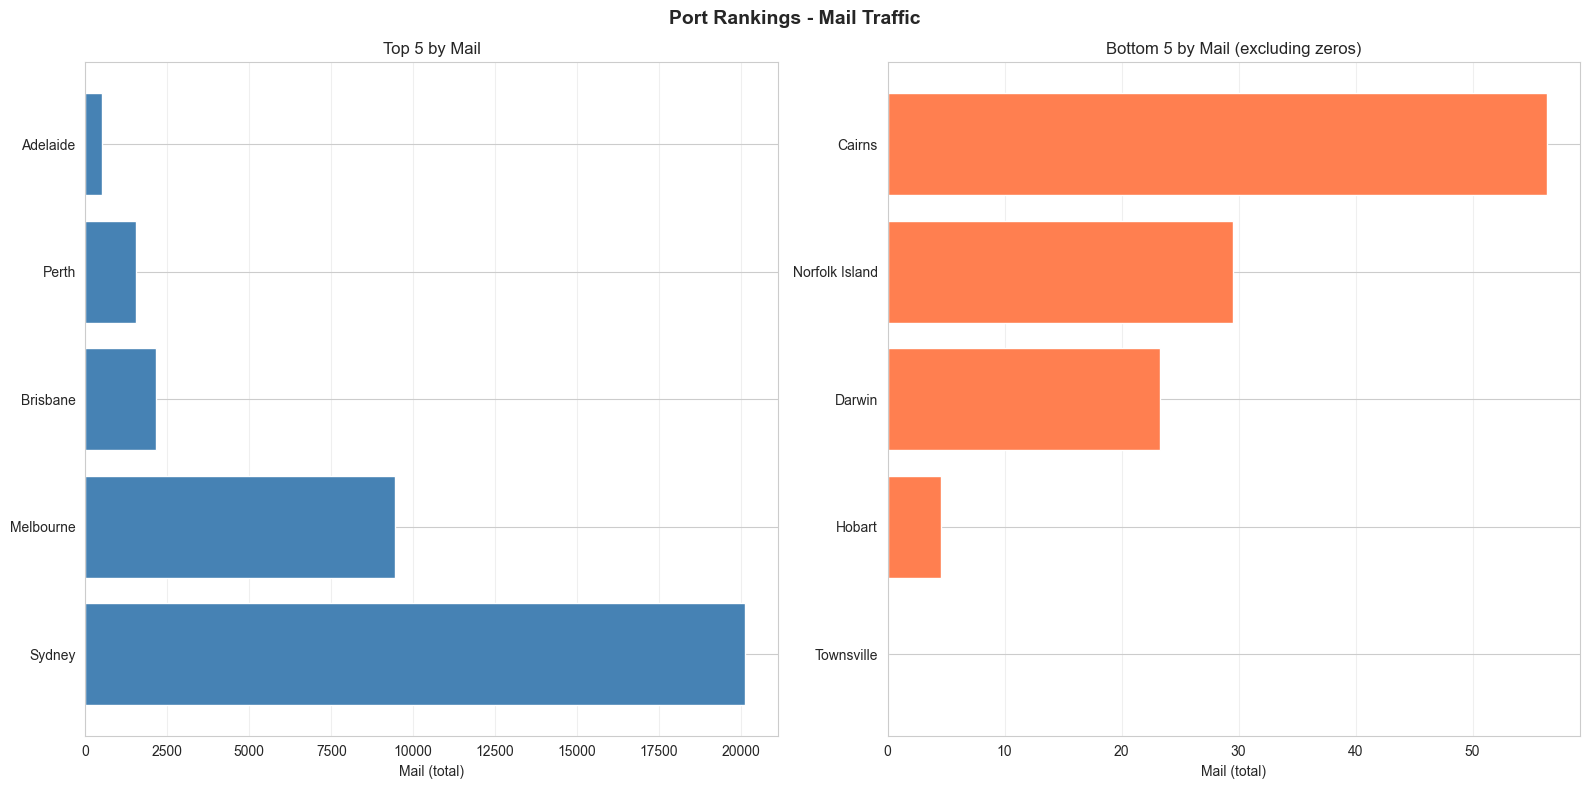

In [84]:
print("\nMAIL GEOGRAPHICAL PATTERNS ANALYSIS")
print("-"*100)

# By Country
country_result = analyzer.analyze_ranking('mail', 'total', 'country', 5, 5)

print("\nTop 10 Countries by Mail Traffic:")
country_df = country_result['data']['top'].copy()
country_df['% of Total'] = (country_df['Mail_Total_(tonnes)'] / country_df['Mail_Total_(tonnes)'].sum() * 100)
display(country_df[['Label', 'Mail_Total_(tonnes)', '% of Total']])

# By Australian Port (Hub Analysis)
port_result = analyzer.analyze_ranking('mail', 'total', 'port', 5, 5)

print("\nAustralian Port Hub Analysis:")
display(port_result['data']['top'][['Label', 'Mail_Total_(tonnes)']])


PASSENGER TRAFFIC BALANCE ANALYSIS
----------------------------------------------------------------------------------------------------

Most Imbalanced Routes:


,Label,Passengers_In,Passengers_Out,Balance_Ratio,Status
228,Sydney ↔ Auckland,1486050,1475162,0.992673,Balanced
280,Sydney ↔ Singapore,744562,695456,0.934047,Balanced
281,Sydney ↔ Tokyo,588121,703995,1.197024,Balanced
249,Sydney ↔ Hong Kong,612428,539472,0.880874,Balanced
218,Perth ↔ Singapore,487258,465668,0.955691,Balanced
37,Brisbane ↔ Auckland,438887,454359,1.035253,Balanced
237,Sydney ↔ Christchurch,454649,427708,0.940743,Balanced
179,Melbourne ↔ Singapore,454823,410428,0.902391,Balanced
259,Sydney ↔ Los Angeles,420215,442749,1.053625,Balanced
251,Sydney ↔ Honolulu,439333,422481,0.961642,Balanced


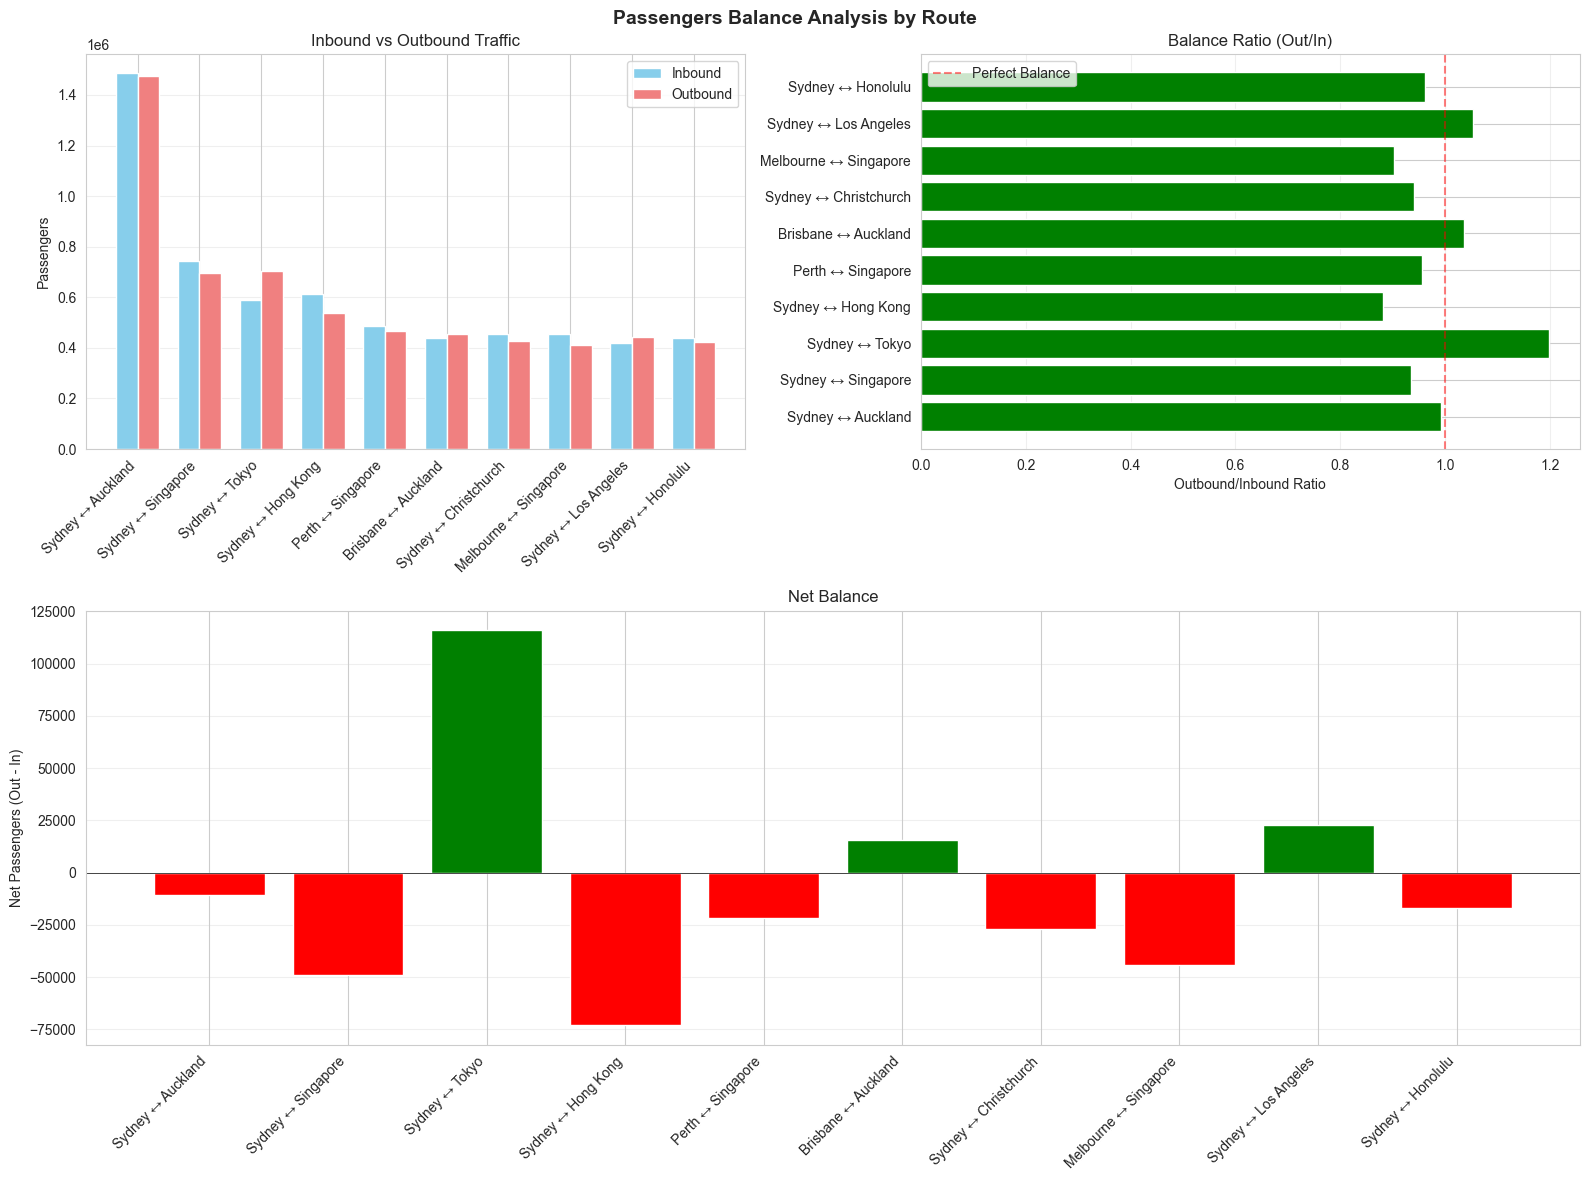

In [85]:
print("\nPASSENGER TRAFFIC BALANCE ANALYSIS")
print("-"*100)

balance_result = analyzer.analyze_balance('passengers', groupby_level='route')

print("\nMost Imbalanced Routes:")
balance_df = balance_result['data'].head(10).copy()
balance_df['Status'] = balance_df['Balance_Ratio'].apply(
    lambda x: 'Balanced' if 0.8 <= x <= 1.2 else 'Imbalanced' if pd.notna(x) else 'N/A'
)
display(balance_df[['Label', 'Passengers_In', 'Passengers_Out', 'Balance_Ratio', 'Status']])


FREIGHT TRAFFIC BALANCE ANALYSIS
----------------------------------------------------------------------------------------------------

Most Imbalanced Routes:


,Label,Freight_In_(tonnes),Freight_Out_(tonnes),Balance_Ratio,Status
228,Sydney ↔ Auckland,57440.857,69271.932,1.205970,Imbalanced
281,Sydney ↔ Tokyo,33854.213,45301.715,1.338141,Imbalanced
280,Sydney ↔ Singapore,32679.365,36633.039,1.120984,Balanced
259,Sydney ↔ Los Angeles,53109.768,15620.850,0.294124,Imbalanced
218,Perth ↔ Singapore,12545.204,41020.036,3.269778,Imbalanced
249,Sydney ↔ Hong Kong,17811.279,33801.253,1.897744,Imbalanced
179,Melbourne ↔ Singapore,20200.015,29191.328,1.445114,Imbalanced
138,Melbourne ↔ Auckland,17583.249,24459.563,1.391072,Imbalanced
155,Melbourne ↔ Hong Kong,14770.265,24725.001,1.673971,Imbalanced
163,Melbourne ↔ Los Angeles,20729.192,12877.197,0.621211,Imbalanced


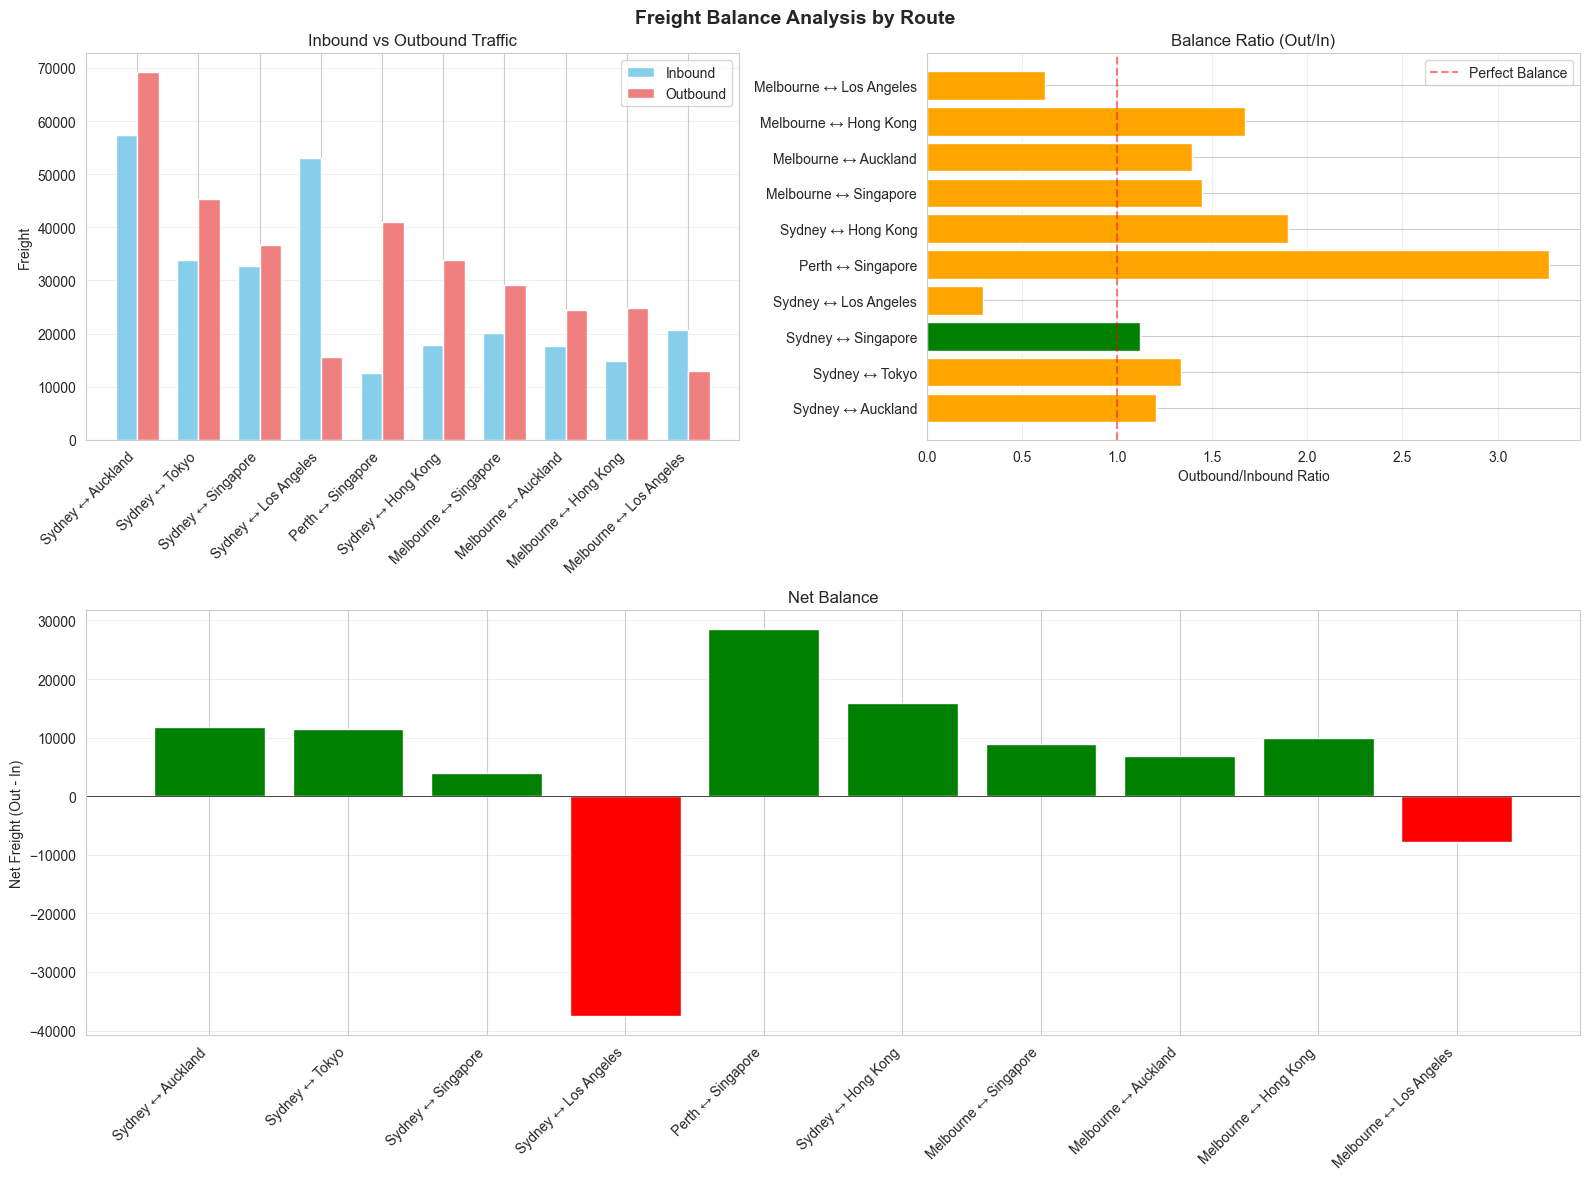

In [86]:
print("\nFREIGHT TRAFFIC BALANCE ANALYSIS")
print("-"*100)

balance_result = analyzer.analyze_balance('freight', groupby_level='route')

print("\nMost Imbalanced Routes:")
balance_df = balance_result['data'].head(10).copy()
balance_df['Status'] = balance_df['Balance_Ratio'].apply(
    lambda x: 'Balanced' if 0.8 <= x <= 1.2 else 'Imbalanced' if pd.notna(x) else 'N/A'
)
display(balance_df[['Label', 'Freight_In_(tonnes)', 'Freight_Out_(tonnes)', 'Balance_Ratio', 'Status']])


MAIL TRAFFIC BALANCE ANALYSIS
----------------------------------------------------------------------------------------------------

Most Imbalanced Routes:


,Label,Mail_In_(tonnes),Mail_Out_(tonnes),Balance_Ratio,Status
228,Sydney ↔ Auckland,678.529,2602.248,3.835132,Imbalanced
258,Sydney ↔ London,824.293,1884.976,2.286779,Imbalanced
281,Sydney ↔ Tokyo,1571.223,852.413,0.542516,Imbalanced
278,Sydney ↔ San Francisco,308.044,1819.071,5.905231,Imbalanced
162,Melbourne ↔ London,467.379,1313.325,2.809979,Imbalanced
244,Sydney ↔ Frankfurt,546.450,773.671,1.415813,Imbalanced
274,Sydney ↔ Port Moresby,212.715,1007.500,4.736384,Imbalanced
153,Melbourne ↔ Frankfurt,488.957,712.367,1.456911,Imbalanced
178,Melbourne ↔ San Francisco,38.419,1121.947,29.202920,Imbalanced
280,Sydney ↔ Singapore,846.190,301.476,0.356275,Imbalanced


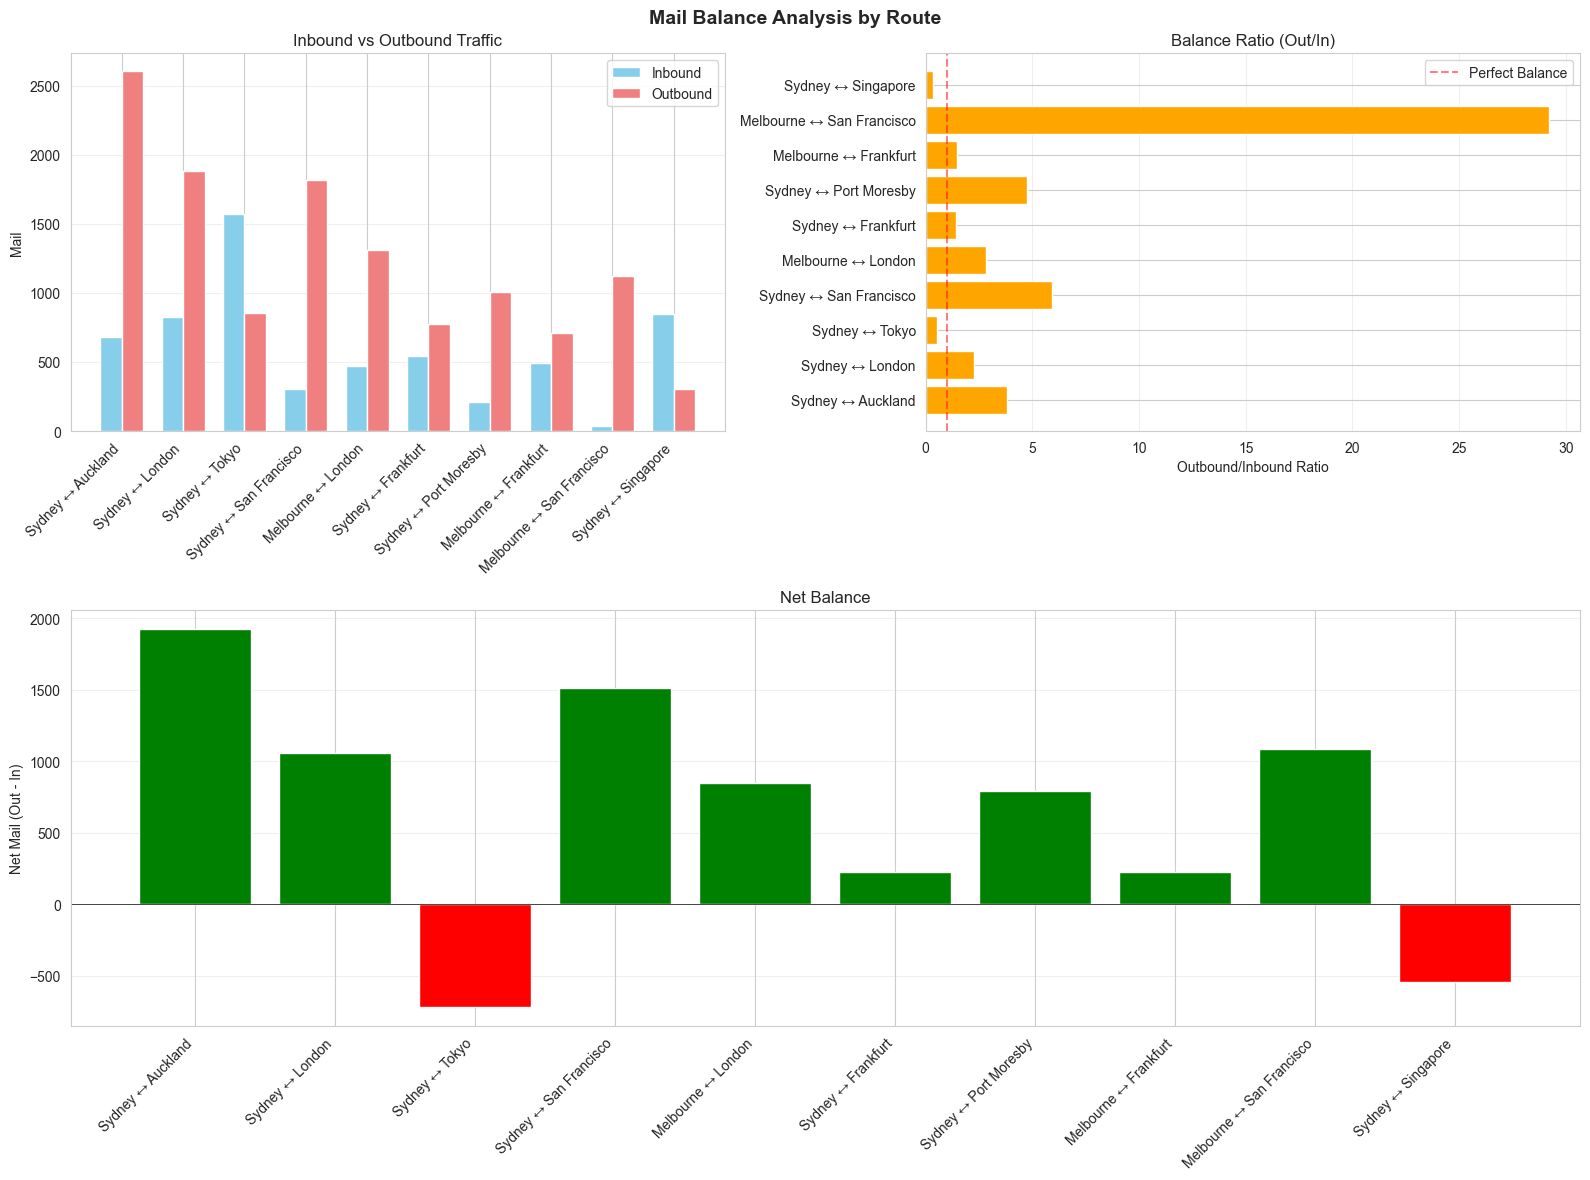

In [87]:
print("\nMAIL TRAFFIC BALANCE ANALYSIS")
print("-"*100)

balance_result = analyzer.analyze_balance('mail', groupby_level='route')

print("\nMost Imbalanced Routes:")
balance_df = balance_result['data'].head(10).copy()
balance_df['Status'] = balance_df['Balance_Ratio'].apply(
    lambda x: 'Balanced' if 0.8 <= x <= 1.2 else 'Imbalanced' if pd.notna(x) else 'N/A'
)
display(balance_df[['Label', 'Mail_In_(tonnes)', 'Mail_Out_(tonnes)', 'Balance_Ratio', 'Status']])

In [88]:
print("\nGROWTH OPPORTUNITIES AND RISK ANALYSIS")
print("-"*100)

# High growth routes
opportunities = analyzer.find_opportunities(min_growth_rate=3.0)
if len(opportunities) > 0:
    print("\nHigh Growth Routes (>3% monthly growth):")
    display(opportunities[['route', 'monthly_growth', 'period_growth', 'current_volume', 'potential']].head(10))

# Declining routes
risks = analyzer.identify_risks(max_decline_rate=-2.0)
if len(risks) > 0:
    print("\nDeclining Routes (<2% monthly decline):")
    display(risks[['route', 'monthly_decline', 'period_decline', 'current_volume', 'risk_level']].head(10))

print("ROUTES SELECTED FOR FORECASTING:\n")

# Top performers
print("1. HIGH-VOLUME ROUTES (Critical for business):")
top_routes = passenger_total['data']['top'].head(3)
for idx, row in top_routes.iterrows():
    print(f"   • {row['AustralianPort']} ↔ {row['ForeignPort']} - {row['Passengers_Total']:,.0f} total passengers")

# High growth opportunities 
if len(opportunities) > 0:
    print("\n2. HIGH-GROWTH OPPORTUNITIES (Potential investment targets):")
    for idx, row in opportunities.head(2).iterrows():
        print(f"   • {row['route']} - {row['monthly_growth']:.1f}% monthly growth")

# Declining routes
if len(risks) > 0:
    print("\n3. DECLINING ROUTES (Risk management needed):")
    for idx, row in risks.head(2).iterrows():
        print(f"   • {row['route']} - {row['monthly_decline']:.1f}% monthly decline")


GROWTH OPPORTUNITIES AND RISK ANALYSIS
----------------------------------------------------------------------------------------------------

High Growth Routes (>3% monthly growth):


,route,monthly_growth,period_growth,current_volume,potential
29,Brisbane ↔ Denpasar,8556.795225,34577.631579,7549,Moderate
154,Sydney ↔ Seattle,4650.266667,-24.603175,537,High
11,Adelaide ↔ Kuala Lumpur,1342.159091,3455.555556,163,High
26,Brisbane ↔ Beijing,770.877193,120.833333,77,High
99,Melbourne ↔ Harare,714.768908,820.000000,102,High
35,Brisbane ↔ Kuala Lumpur,709.210348,140.239044,854,High
19,Adelaide ↔ Tokyo,688.467813,30.833333,1108,High
114,Melbourne ↔ Zagreb,415.496676,55.124224,988,High
69,Cairns ↔ Rome,375.653506,-21.789508,1766,High
136,Port Hedland ↔ Jakarta,367.122367,77.162630,588,High



Declining Routes (<2% monthly decline):


,route,monthly_decline,period_decline,current_volume,risk_level
2,Melbourne ↔ Chicago,100.000000,100.000000,6,Moderate
7,Sydney ↔ Denver,100.000000,-3090.000000,329,Moderate
6,Sydney ↔ Chicago,100.000000,100.000000,25,Moderate
1,Melbourne ↔ Bandar Seri Begawan,54.085519,78.205128,285,Moderate
4,Sydney ↔ Bandar Seri Begawan,43.636773,60.655738,255,Moderate
3,Perth ↔ Nadi,38.888889,75.000000,10,Moderate
0,Adelaide ↔ Noumea,16.666667,66.666667,9,Moderate
5,Sydney ↔ Buenos Aires,3.613981,16.114729,15289,High


ROUTES SELECTED FOR FORECASTING:

1. HIGH-VOLUME ROUTES (Critical for business):
   • Sydney ↔ Auckland - 2,961,212 total passengers
   • Sydney ↔ Singapore - 1,440,018 total passengers
   • Sydney ↔ Tokyo - 1,292,116 total passengers

2. HIGH-GROWTH OPPORTUNITIES (Potential investment targets):
   • Brisbane ↔ Denpasar - 8556.8% monthly growth
   • Sydney ↔ Seattle - 4650.3% monthly growth

3. DECLINING ROUTES (Risk management needed):
   • Melbourne ↔ Chicago - 100.0% monthly decline
   • Sydney ↔ Denver - 100.0% monthly decline


### MODEL SELECTION


FORECASTING ANALYSIS FOR: Sydney-Auckland
Data prepared for Sydney-Auckland
Training samples: 40
Testing samples: 11
Date range: 1985-01 to 1989-03

Fitting SARIMA model...
SARIMA model fitted successfully with params ((2, 1, 2), (1, 1, 1, 12))

Fitting Prophet model...
Prophet model fitted successfully

Fitting Exponential Smoothing model...
Exponential Smoothing model fitted successfully

Fitting Moving Average model...
Moving Average model fitted successfully (window=3)

MODEL EVALUATION RESULTS

SARIMA:
  MAE:  6,903
  RMSE: 7,832
  MAPE: 10.8%

Prophet:
  MAE:  9,577
  RMSE: 10,758
  MAPE: 15.5%

ExpSmoothing:
  MAE:  7,719
  RMSE: 8,910
  MAPE: 12.0%

MovingAvg:
  MAE:  15,979
  RMSE: 17,631
  MAPE: 24.7%

BEST MODEL: SARIMA (lowest MAPE: 10.8%)

Generating forecast with best model: SARIMA
SARIMA forecast generated for 12 months

FUTURE FORECAST SUMMARY: Sydney-Auckland

SARIMA Forecast:
  Next 6 months average: 58,890
  Next 12 months average: 60,192
  Growth trend: 8.8%

  Mon

,Route,Best Model,MAPE (%),6-Month Avg,12-Month Avg,Growth (%)
0,Sydney-Auckland,SARIMA,10.833277,58890.290152,60191.891715,8.813547
1,Sydney-Singapore,ExpSmoothing,5.494964,30971.441271,32551.318568,12.591805
2,Sydney-Tokyo,MovingAvg,7.235320,32340.277778,29315.944444,-31.810228


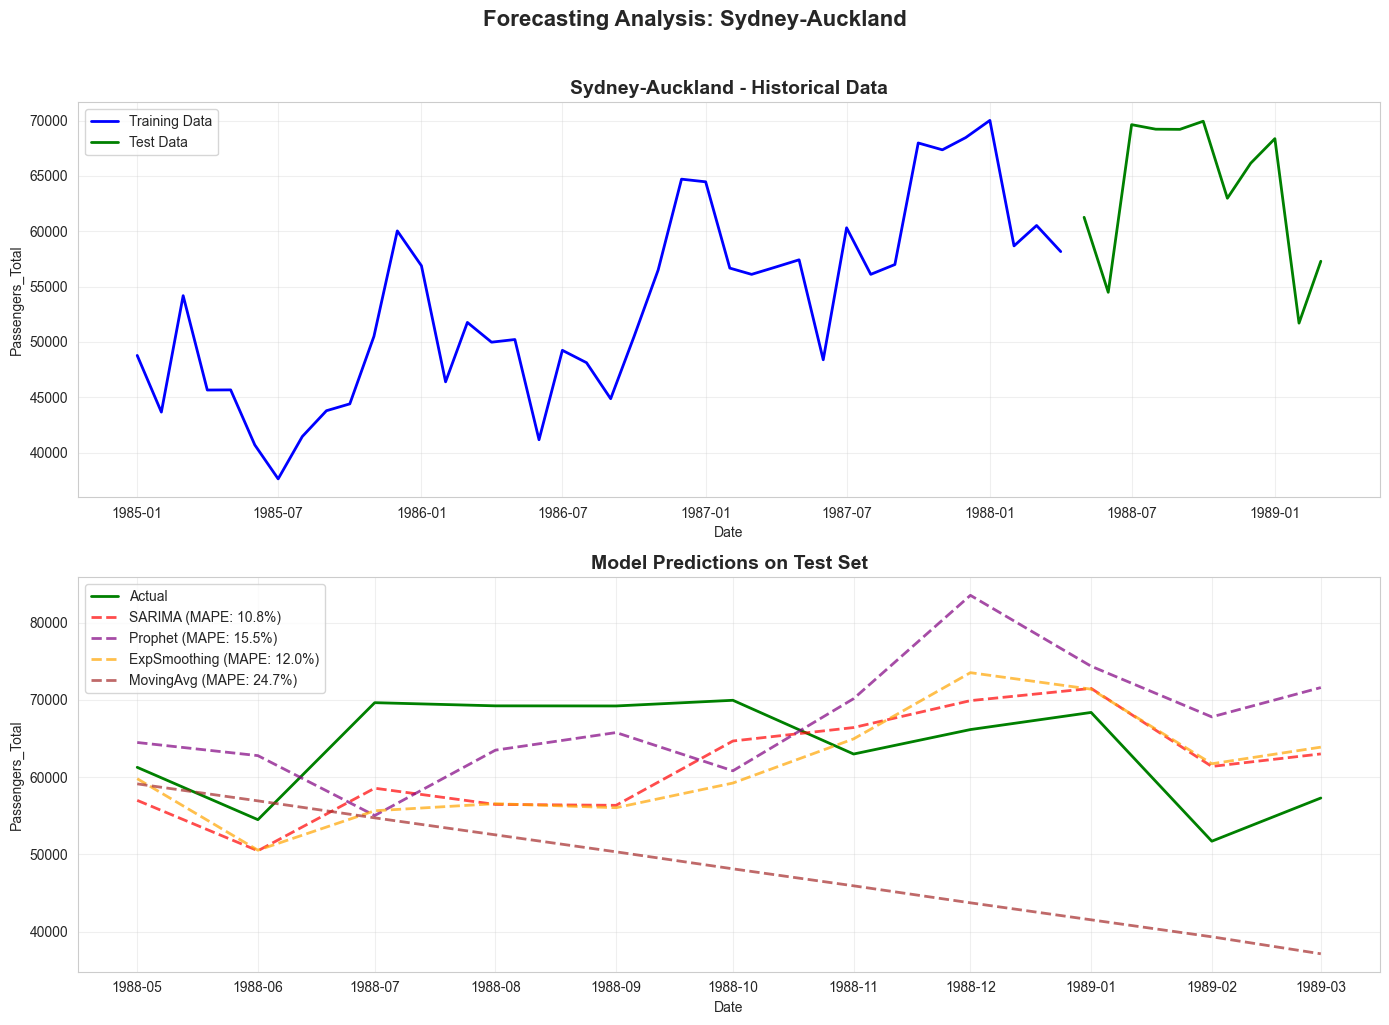

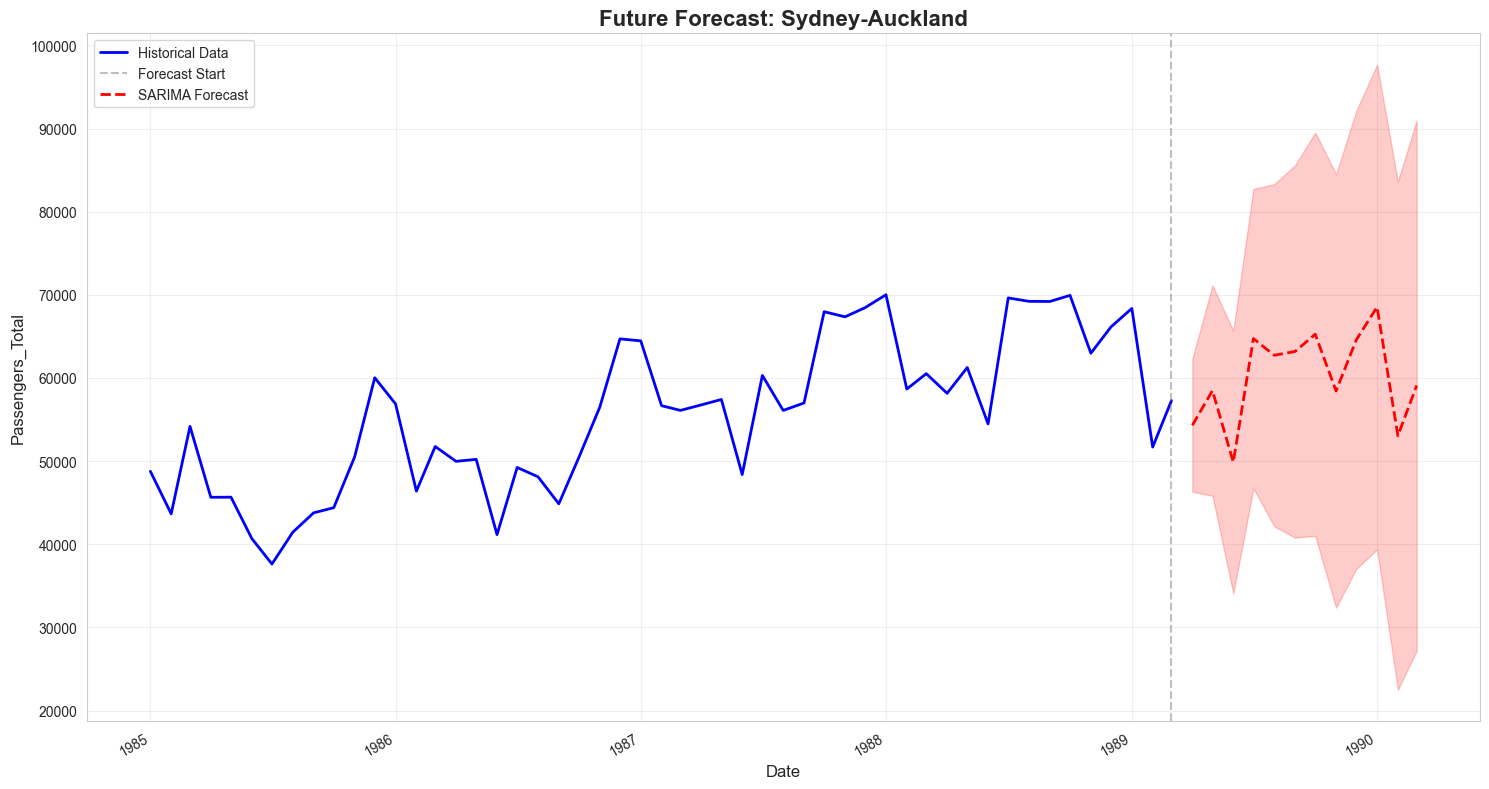

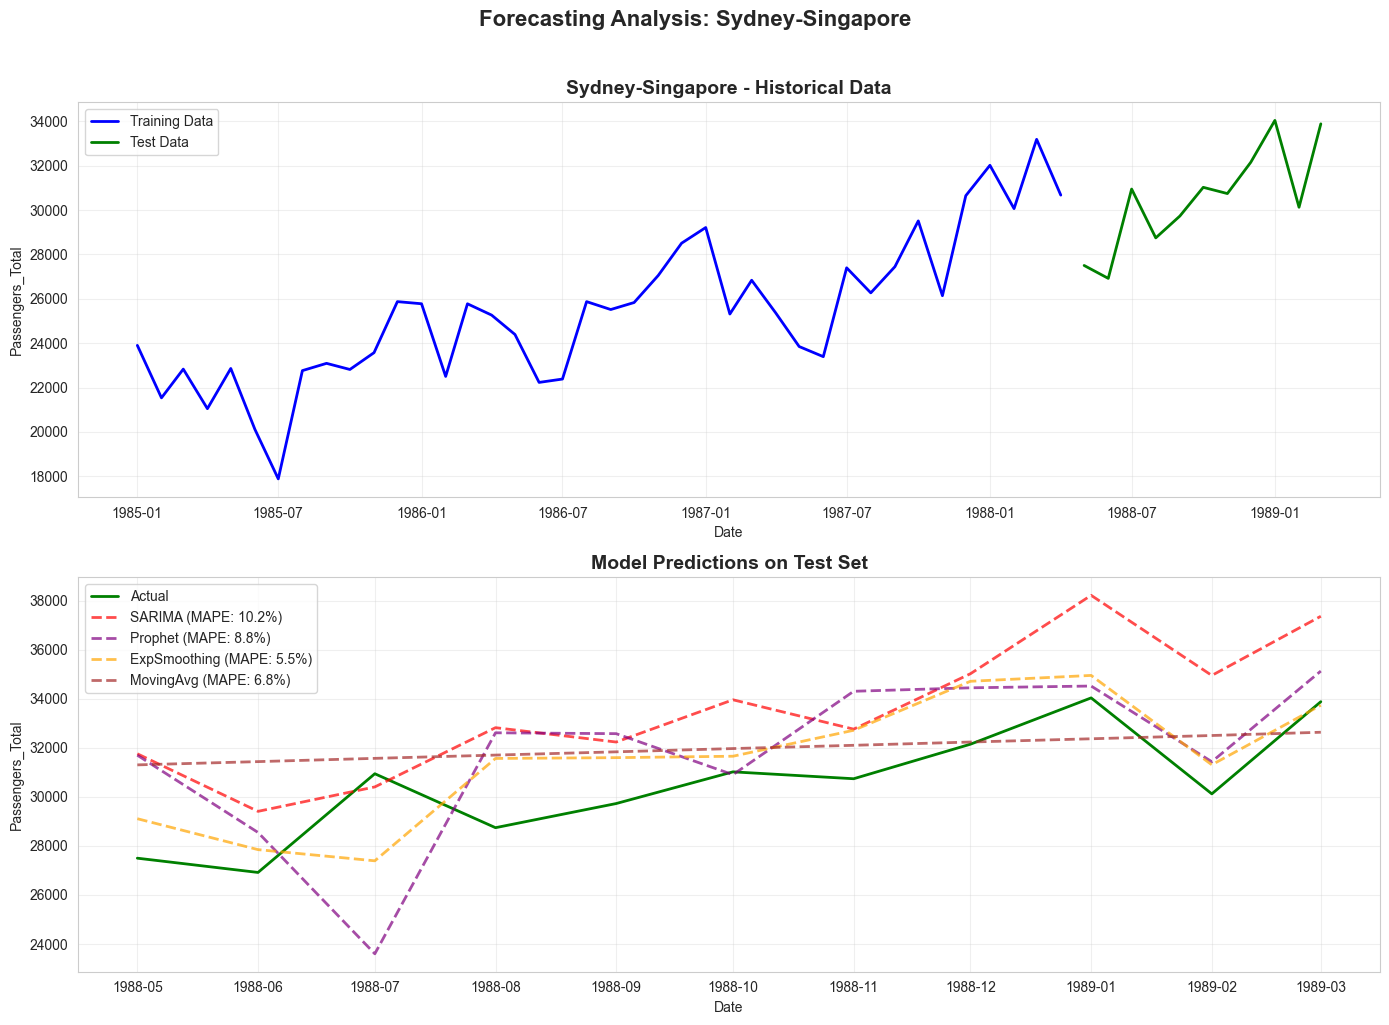

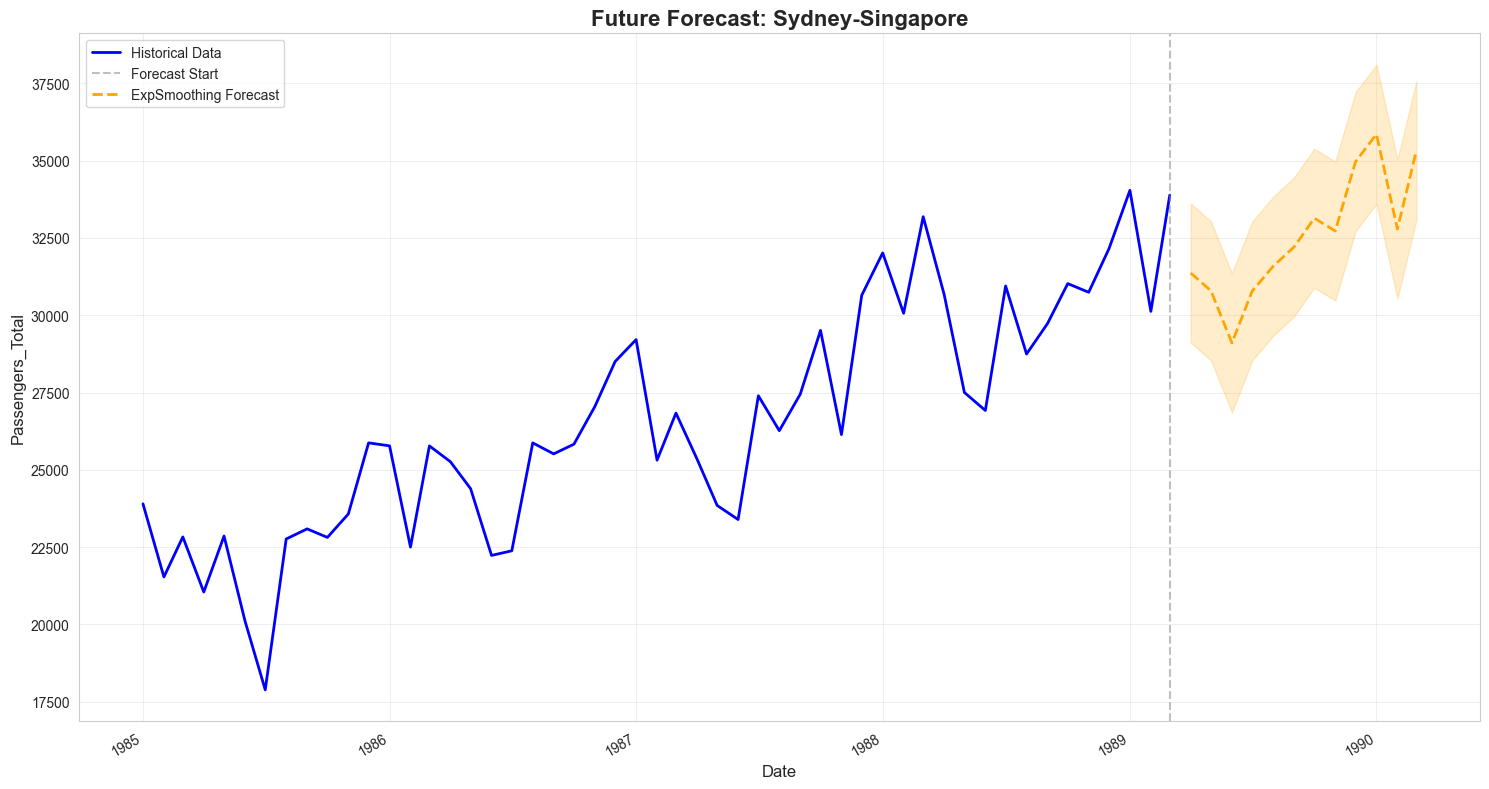

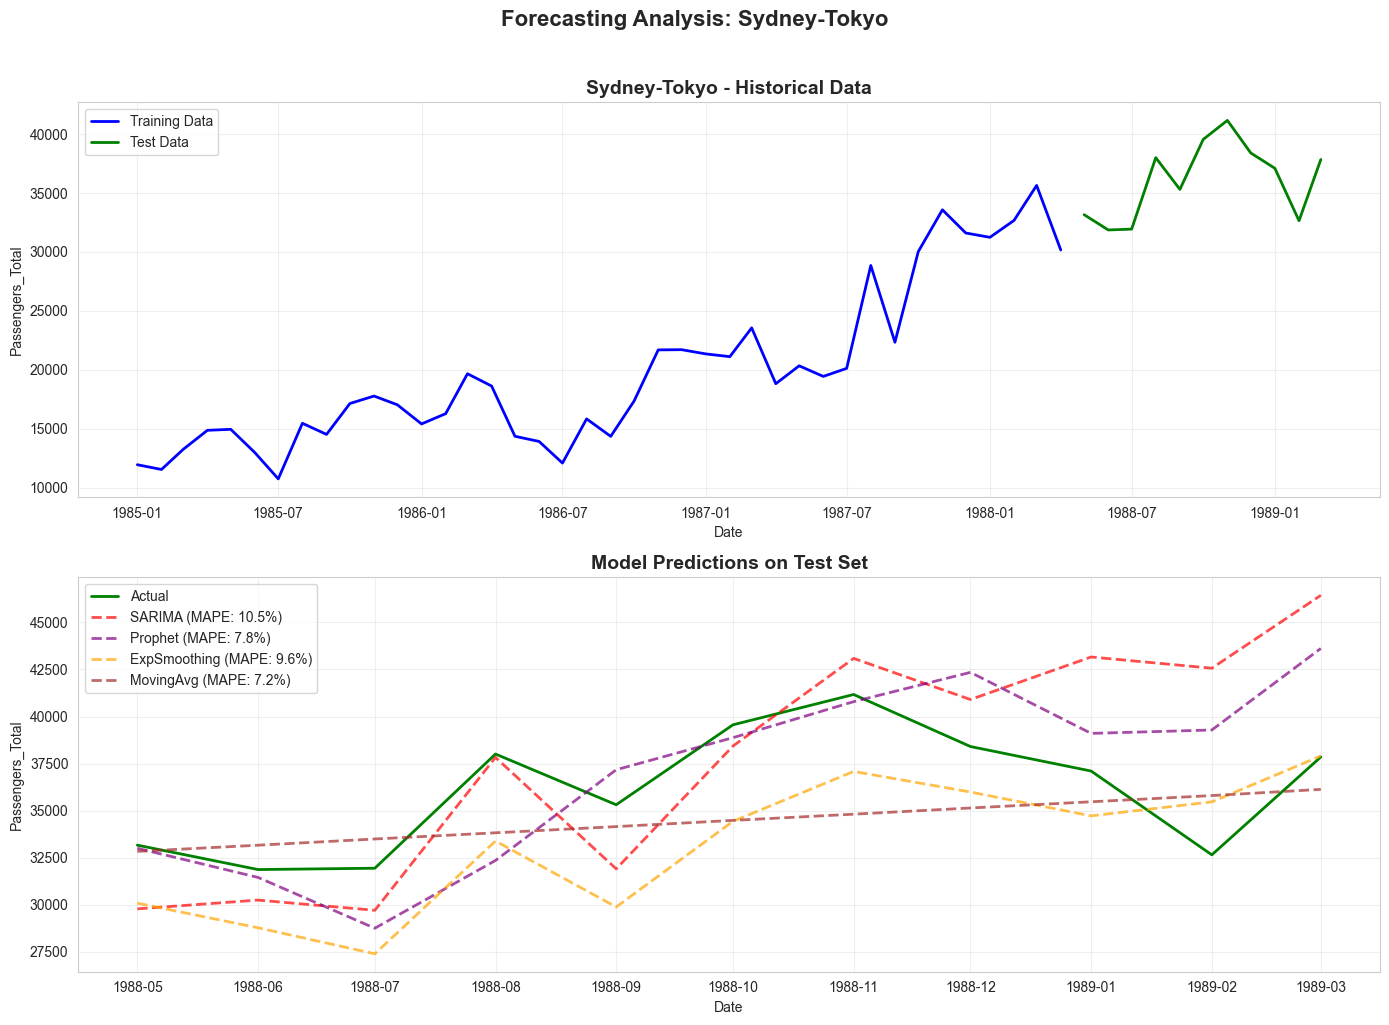

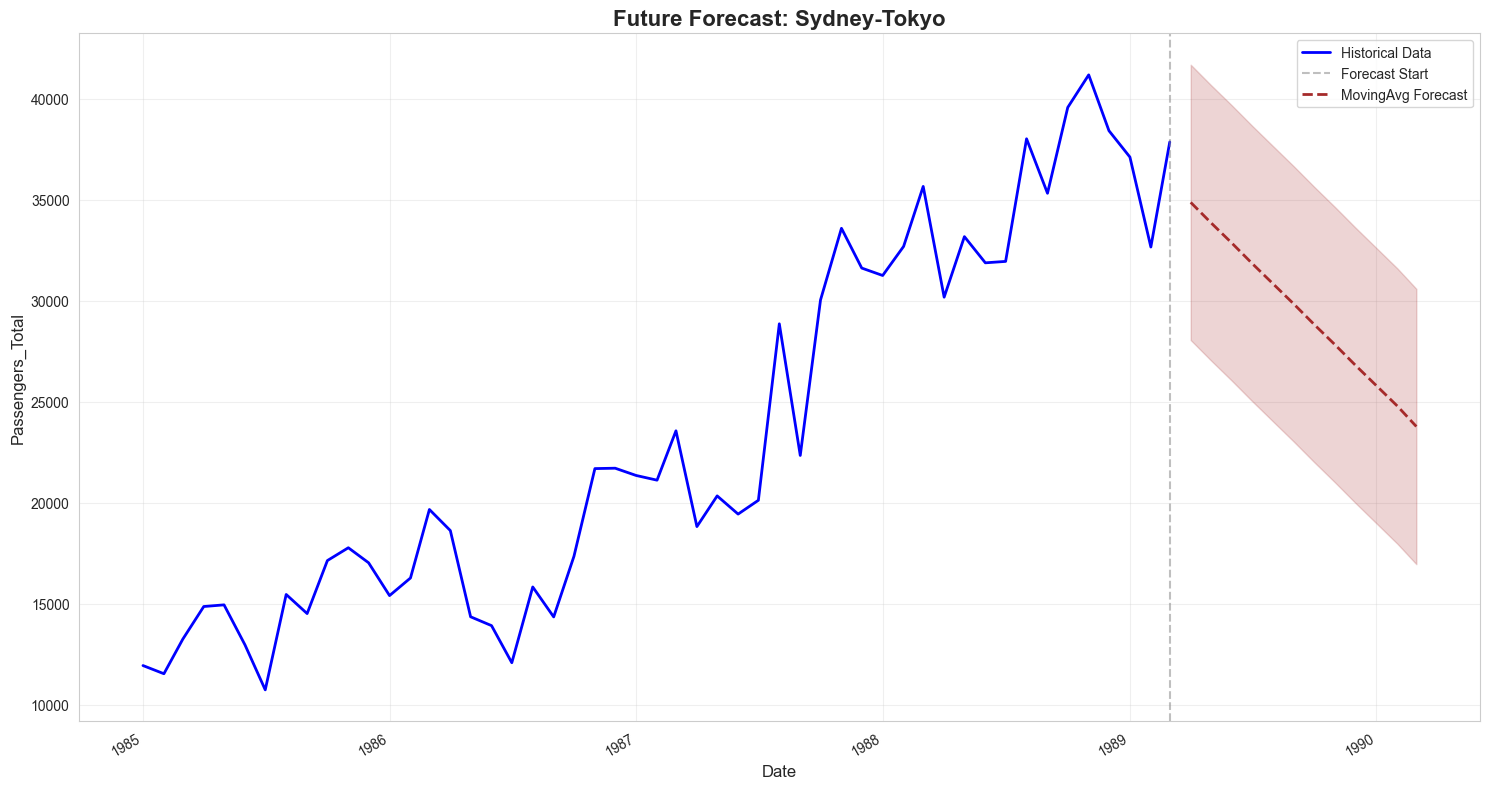

In [92]:
from route_forcaster import RouteForecaster
from future_forcaster import FutureForecaster

routes = ['Sydney-Auckland', 'Sydney-Singapore', 'Sydney-Tokyo']
summary_data = []

for route in routes:
    # Run analysis
    rf = RouteForecaster(airtraffic_df, route, 'passengers', 'total')
    rf.run_complete_analysis()
    
    # Generate future forecasts
    ff = FutureForecaster(rf)
    ff.get_best_model_forecast(n_months=12)
    
    # Plot visualization
    ff.plot_future_forecast(model_name=rf.metrics and min(rf.metrics.keys(), key=lambda x: rf.metrics[x]['MAPE']))
    
    # Summary report
    ff.summary_report()
    
    # Collect for table
    best_model = min(rf.metrics.keys(), key=lambda x: rf.metrics[x]['MAPE'])
    forecast = ff.future_predictions[best_model]['forecast']
    
    summary_data.append({
        'Route': route,
        'Best Model': best_model,
        'MAPE (%)': rf.metrics[best_model]['MAPE'],
        '6-Month Avg': forecast[:6].mean(),
        '12-Month Avg': forecast.mean(),
        'Growth (%)': ((forecast[-1] - forecast[0]) / forecast[0] * 100)
    })

# Display summary table
summary_df = pd.DataFrame(summary_data)
print("\nSUMMARY TABLE")
display(summary_df)